In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-learning-band-gap-prediction/sample_submission.csv
/kaggle/input/machine-learning-band-gap-prediction/train.csv
/kaggle/input/machine-learning-band-gap-prediction/test.csv


In [2]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import copy
from scipy.stats import ks_2samp


In [3]:
train_data = pd.read_csv('/kaggle/input/machine-learning-band-gap-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/machine-learning-band-gap-prediction/test.csv')

In [4]:
dtrain_data = train_data.copy(deep=True)
dtest_data = test_data.copy(deep=True)

In [5]:
print(train_data.shape)
print(test_data.shape)

(2534, 87)
(845, 86)


In [6]:
cols_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]
print(cols_with_missing)

[]


In [7]:
train_data.isnull().sum()

id                         0
polymer                    0
fp_mqns_1                  0
fp_mqns_2                  0
fp_mqns_3                  0
                          ..
fp_o_desc_chi3v            0
fp_o_desc_chi4n            0
fp_o_desc_chi4v            0
fp_o_desc_HallKierAlpha    0
band_gap                   0
Length: 87, dtype: int64

In [8]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype == "object"]
print(categorical_cols)

['polymer']


In [9]:
for col in train_data.columns:
    if train_data[col].dtype.kind in 'i':
        print(f"{col} contains integer data.")

id contains integer data.
fp_mqns_1 contains integer data.
fp_mqns_18 contains integer data.
fp_mqns_39 contains integer data.
fp_mqns_40 contains integer data.
fp_smrVsa_8 contains integer data.
fp_slogPVsa_9 contains integer data.


You can delete all the integer columns, since all of them have 1 unique value.

In [10]:
train_data.loc[:,"fp_slogPVsa_9"].nunique()

1

In [11]:
train_data = train_data.drop(['fp_mqns_1','fp_mqns_18','fp_mqns_39','fp_mqns_40','fp_smrVsa_8','fp_slogPVsa_9'],axis=1)

In [12]:
train_data.shape

(2534, 81)

EDA - 


In [13]:
train_data.shape

(2534, 81)

In [14]:
# plt.figure(figsize=(30,30))
# for i in range(2,train_data.shape[1]-1):
#     ax=plt.subplot(5,5,i+1)
#     plt.imshow(image)
#     plt.title(CLASS_NAMES[label.numpy()[0]])
#     plt.axis('off')

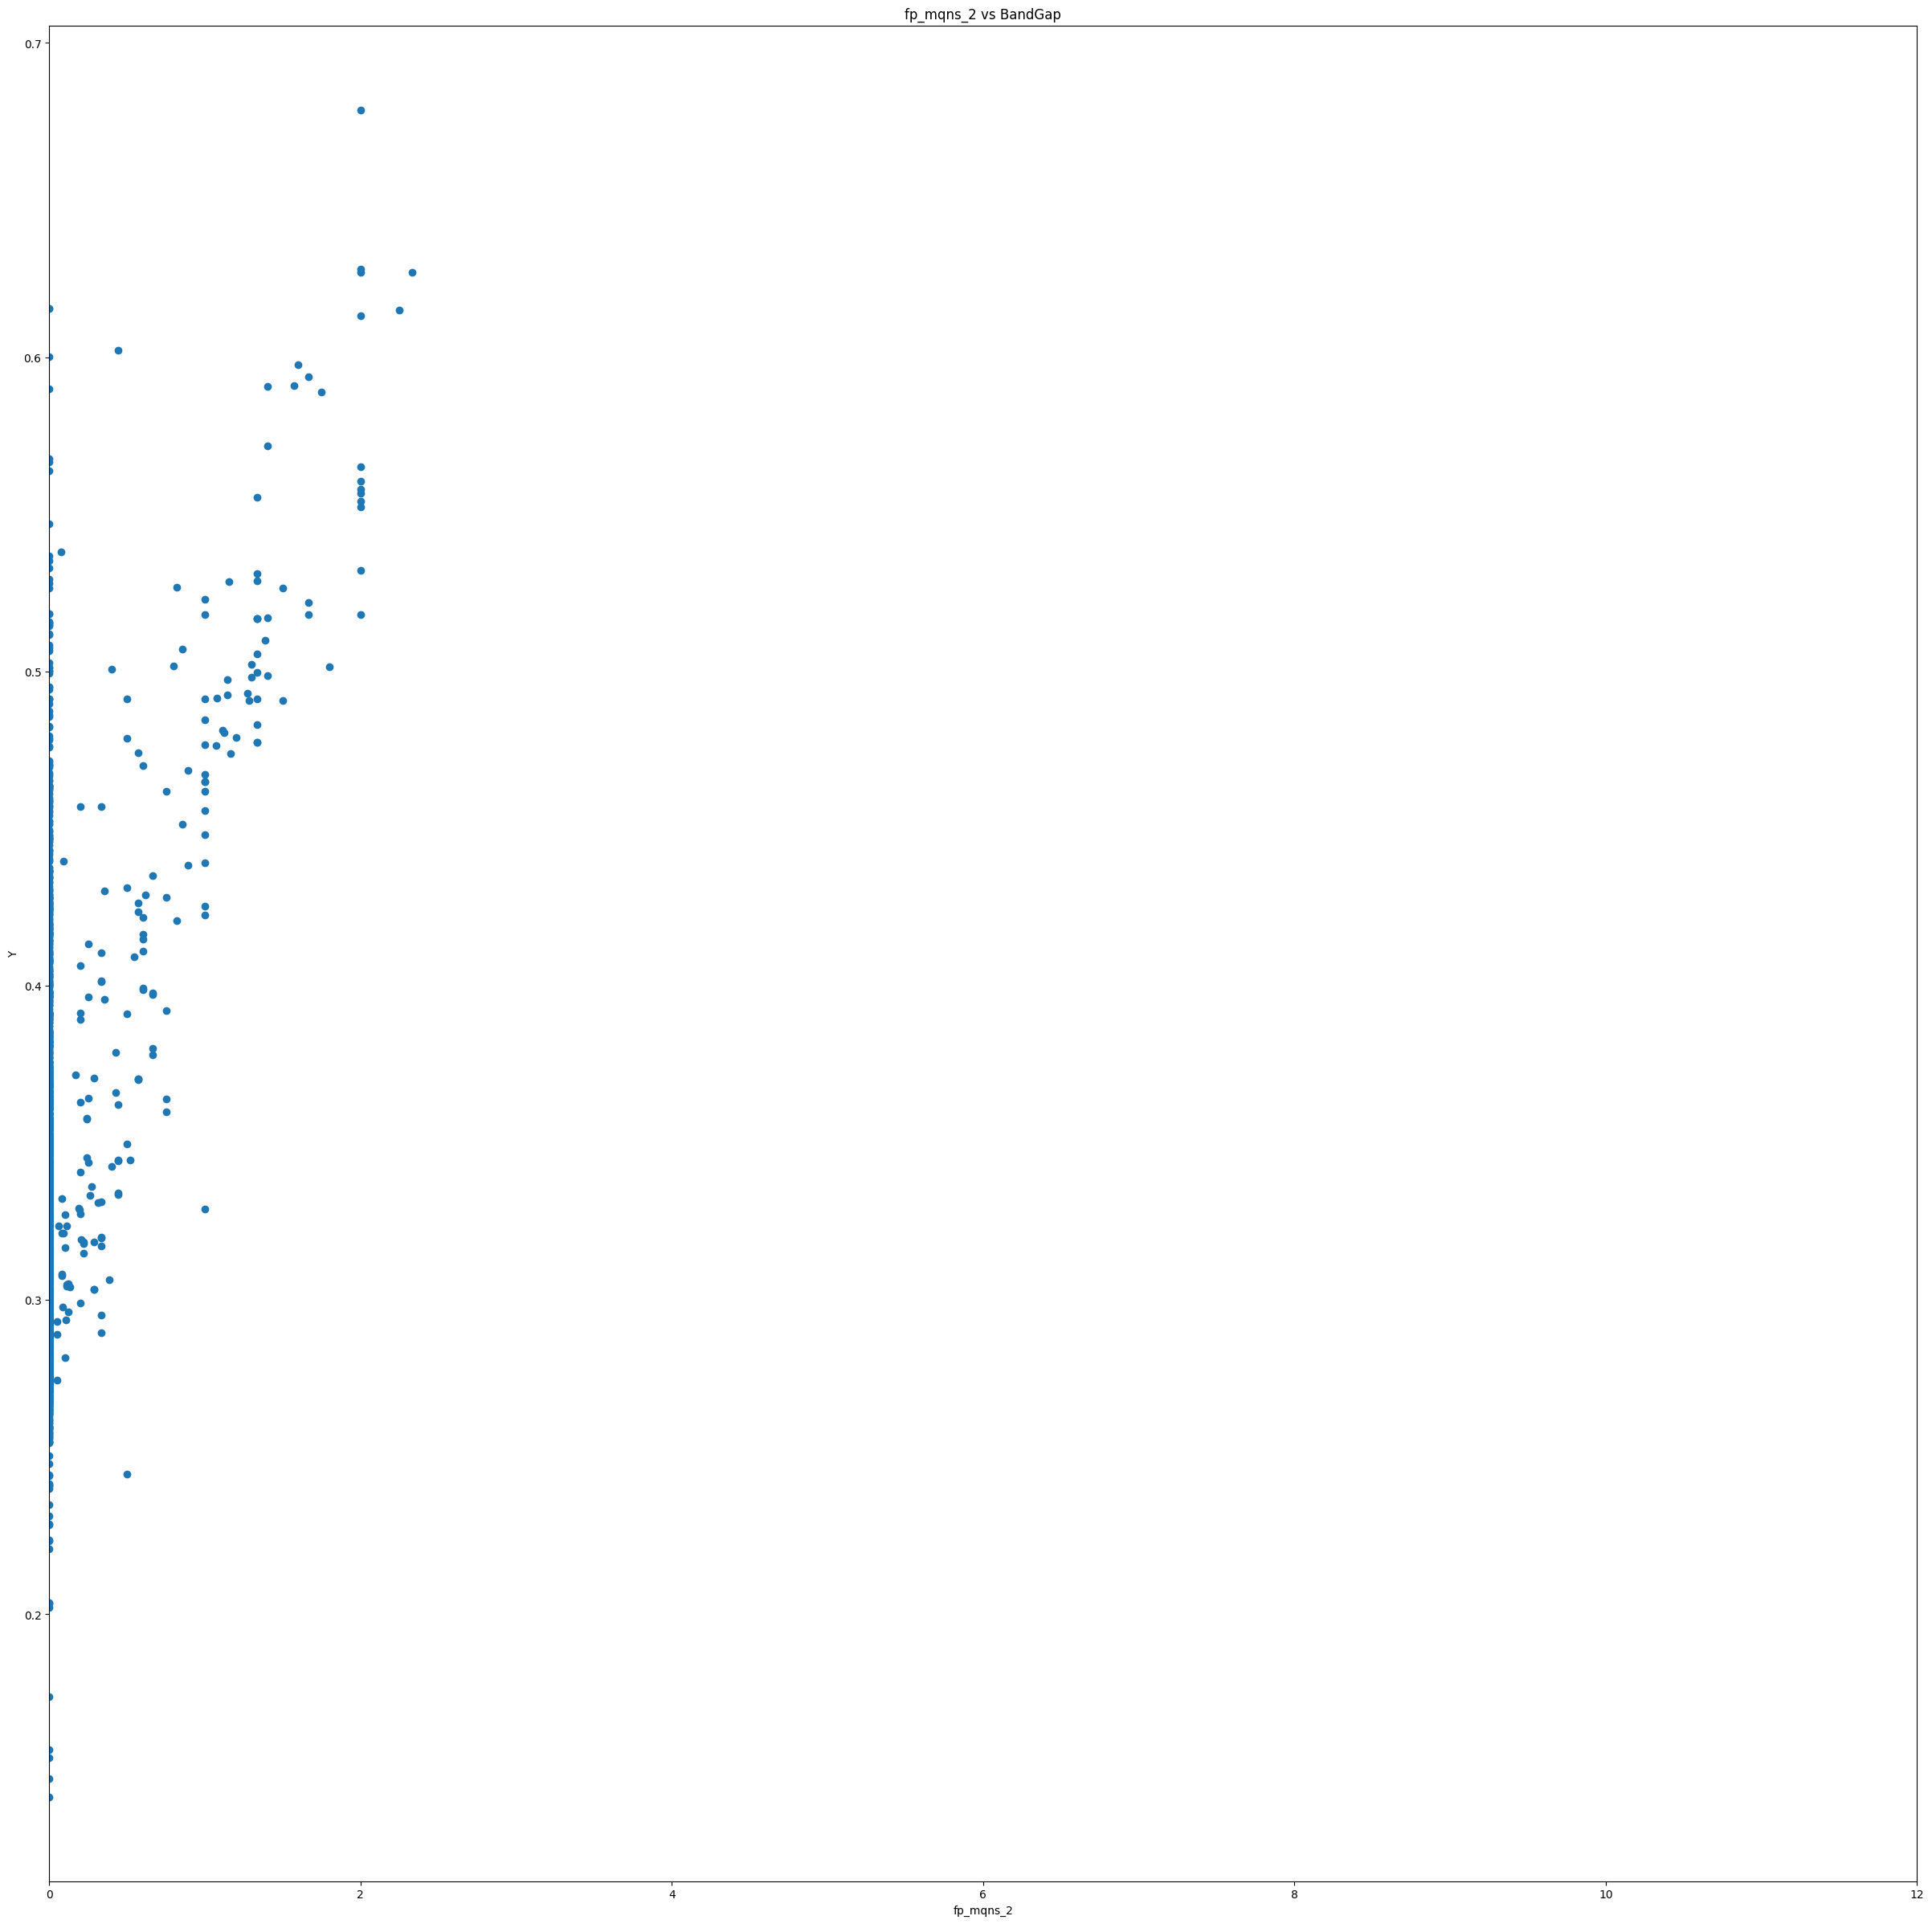

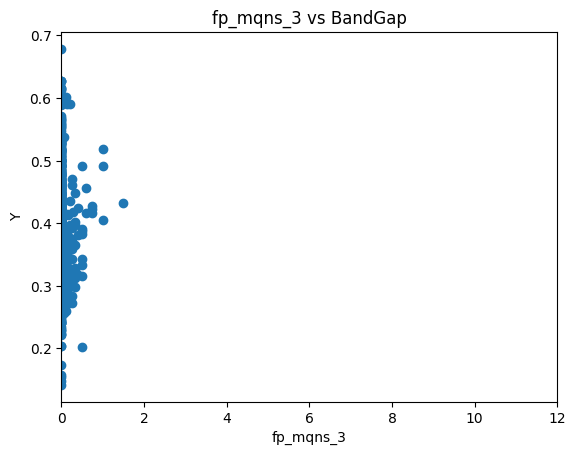

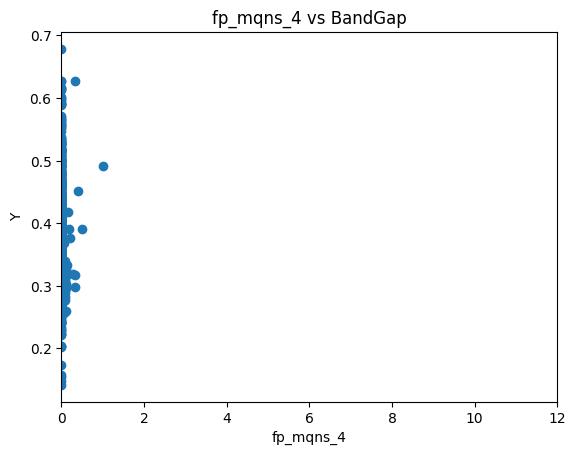

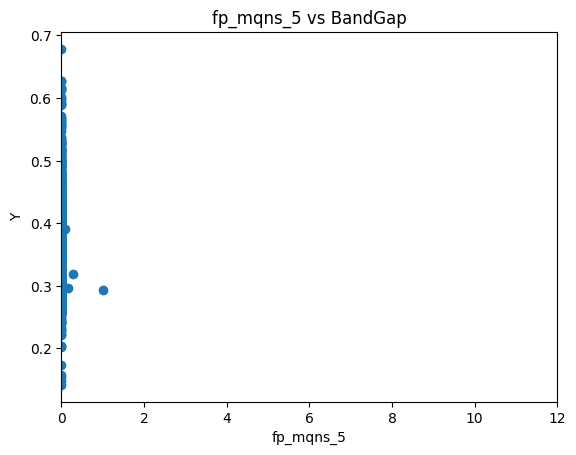

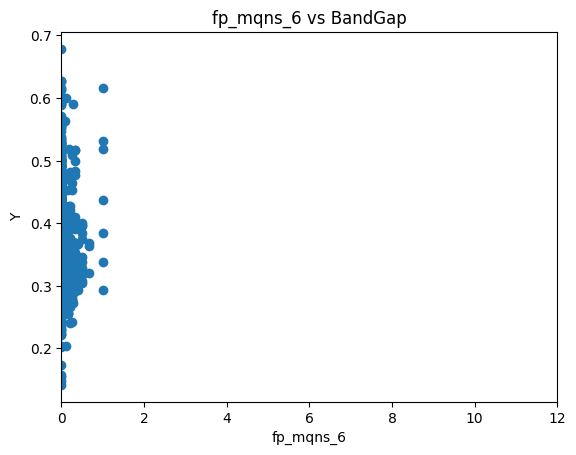

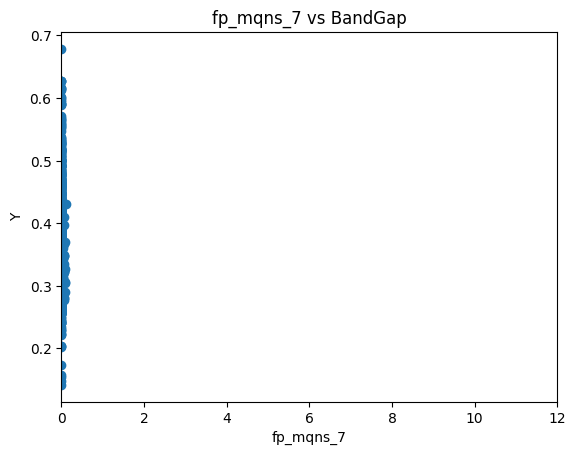

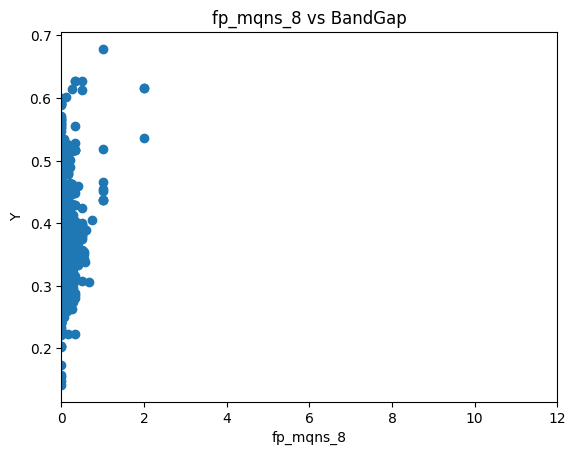

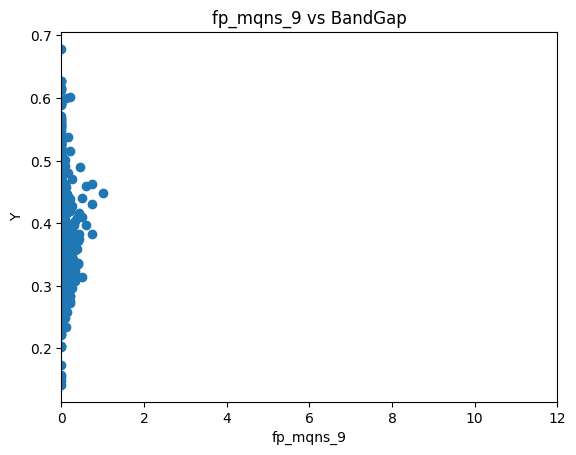

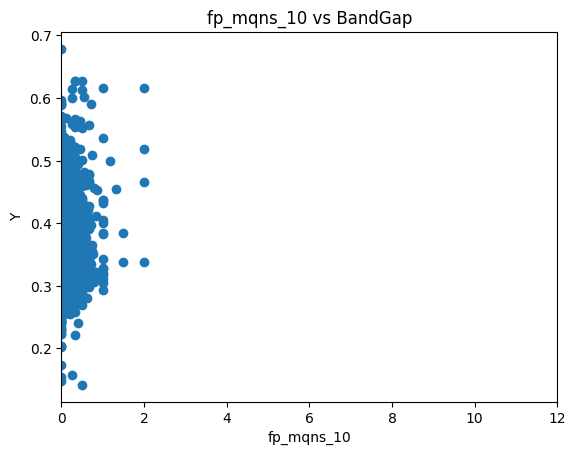

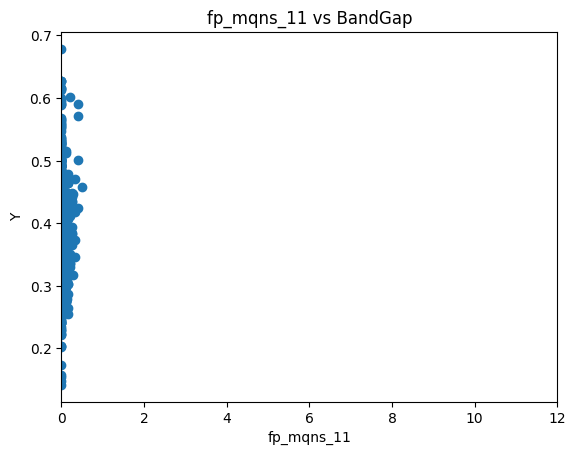

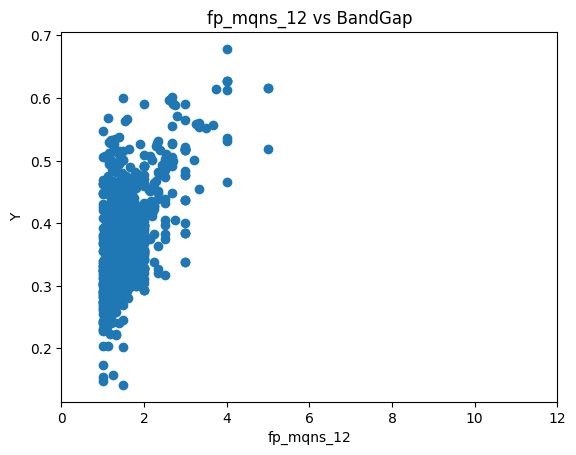

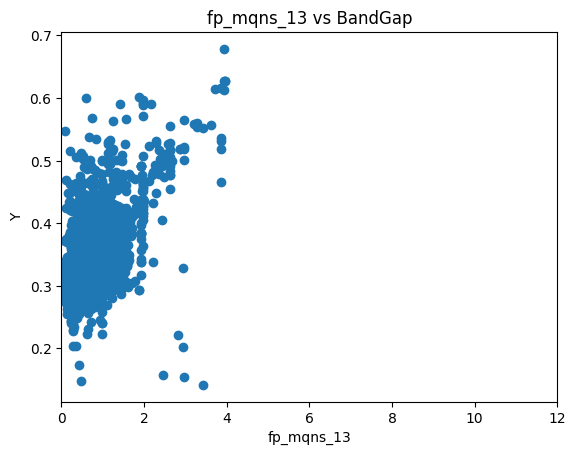

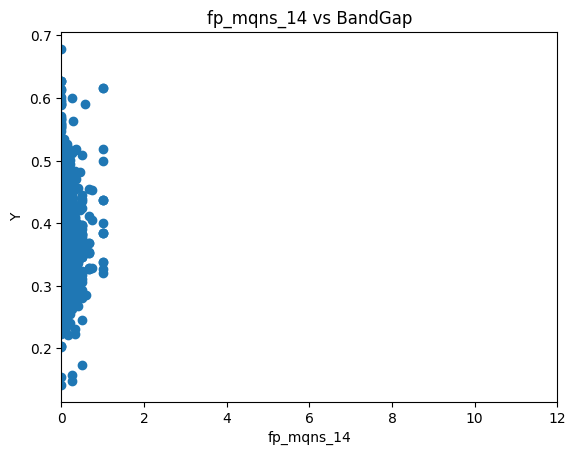

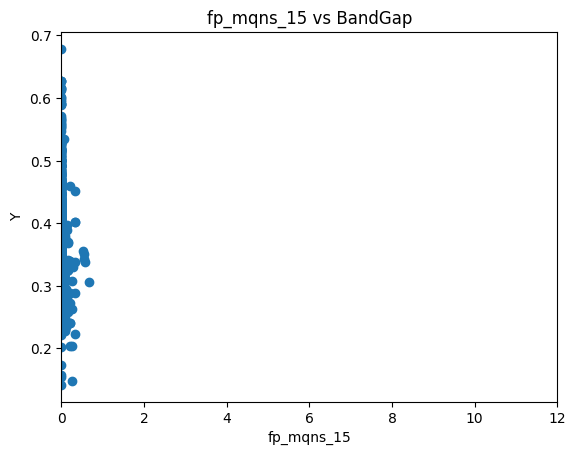

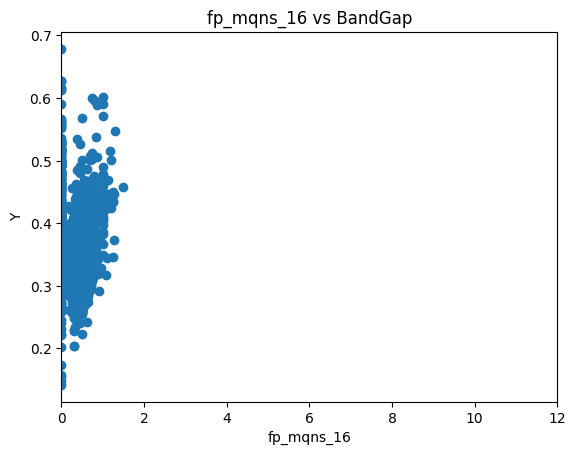

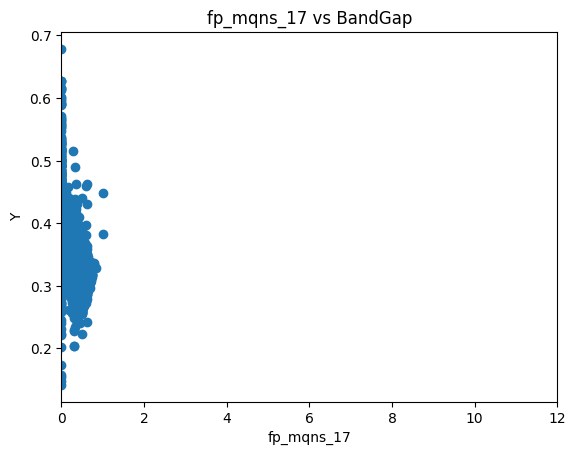

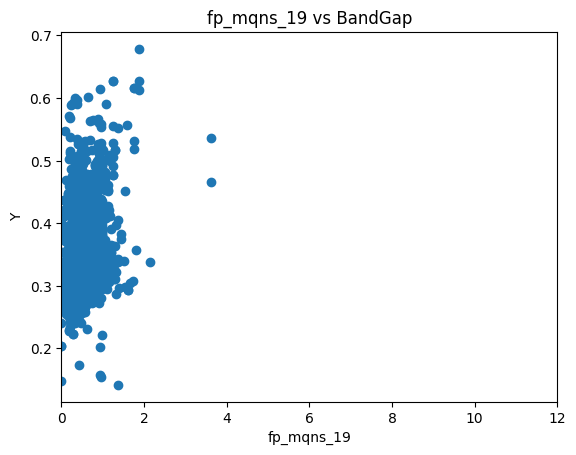

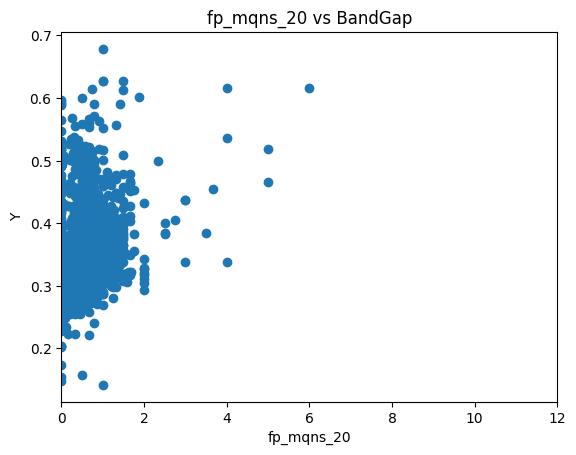

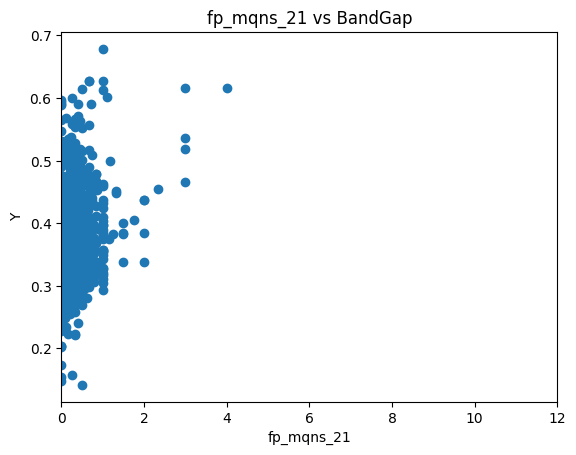

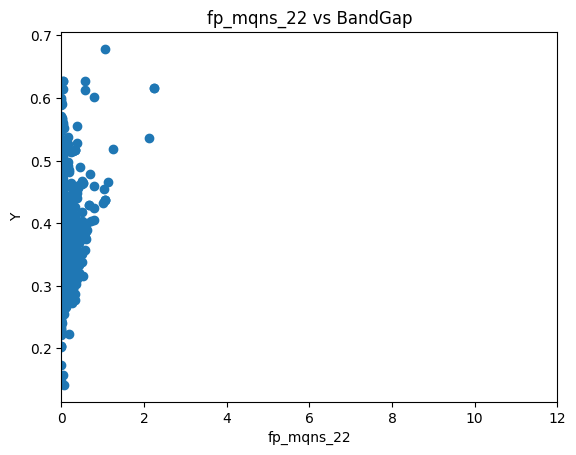

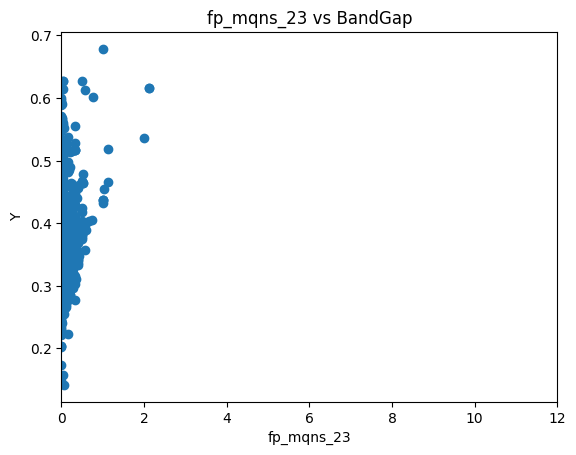

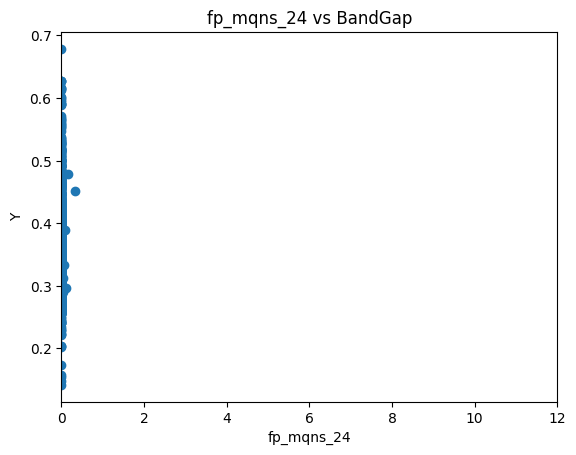

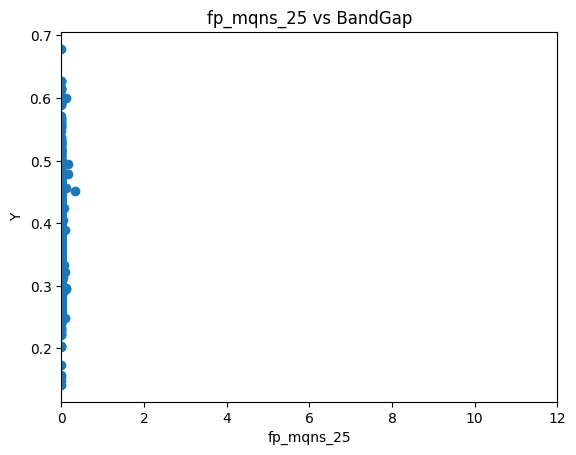

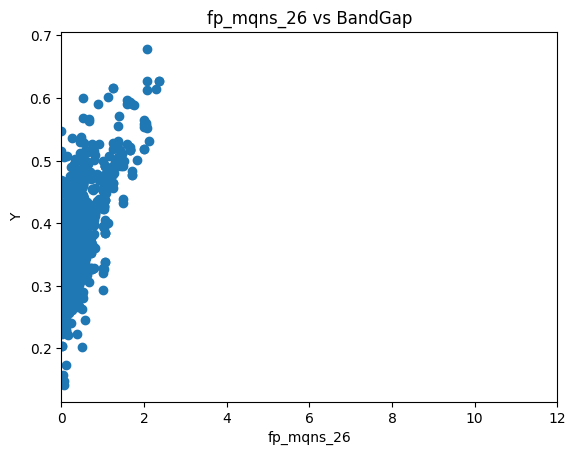

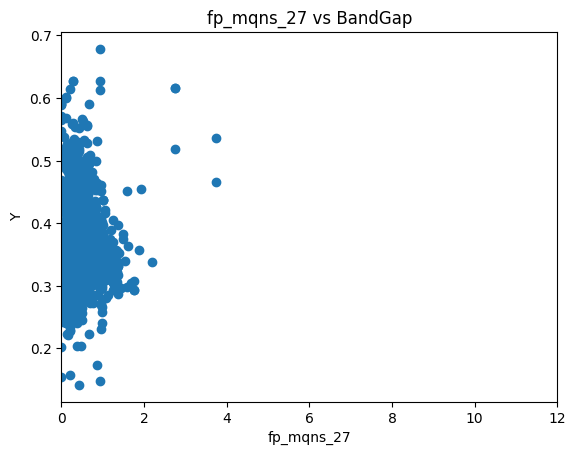

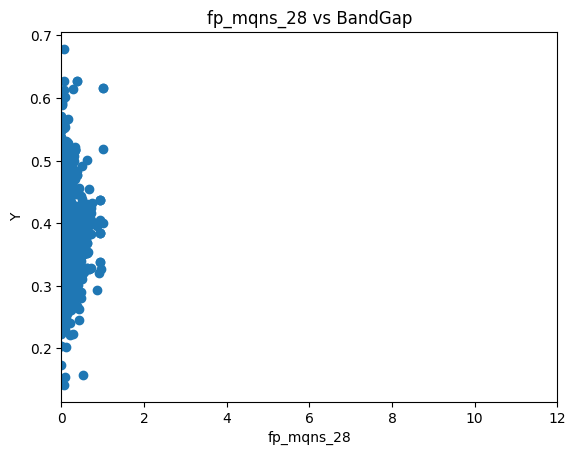

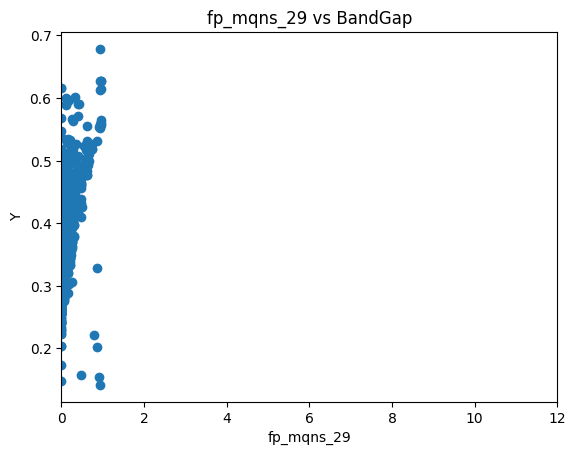

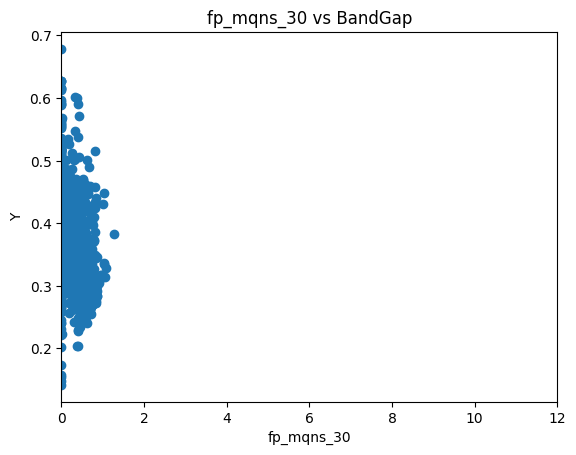

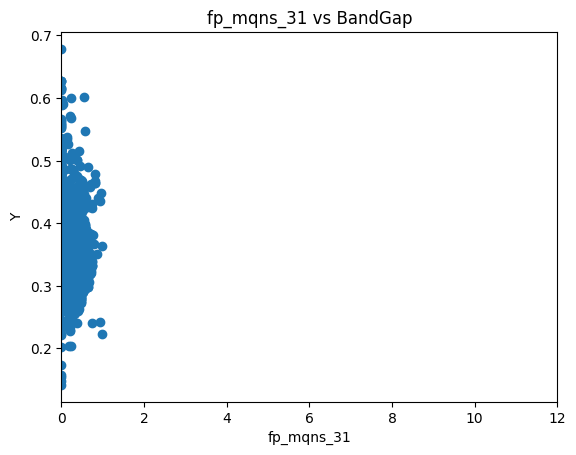

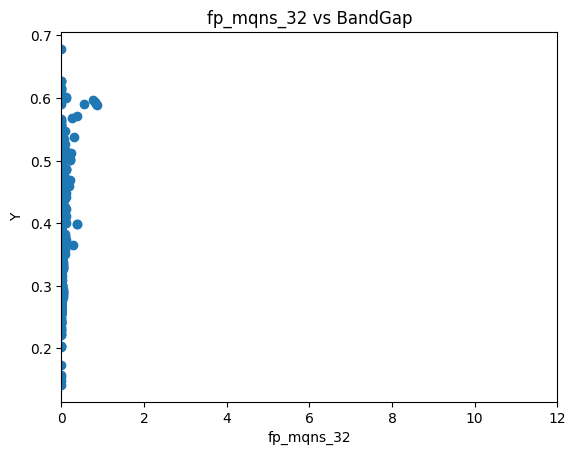

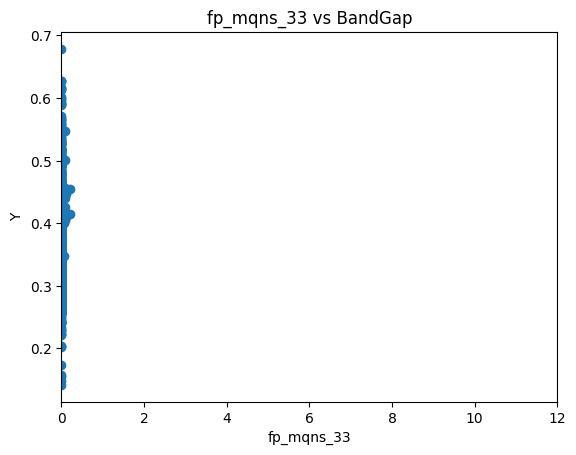

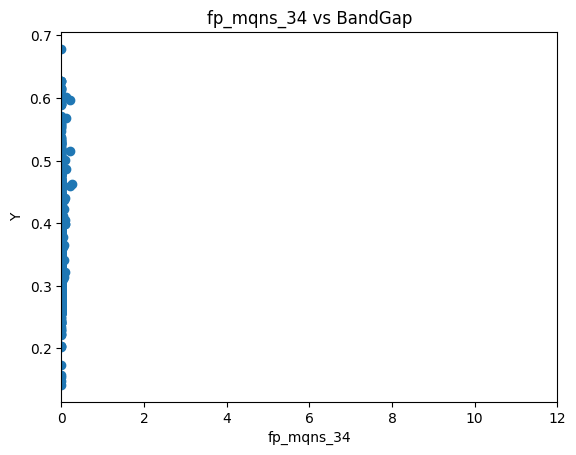

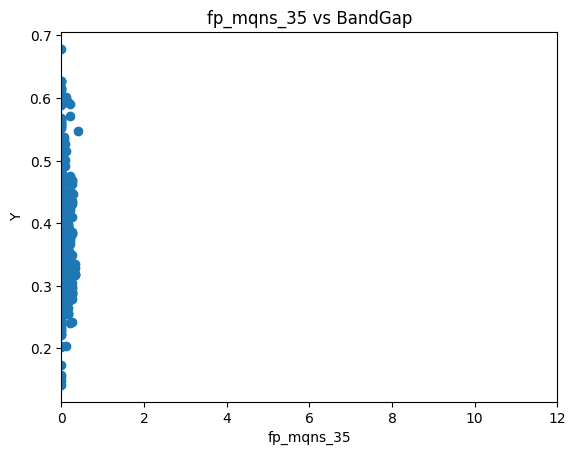

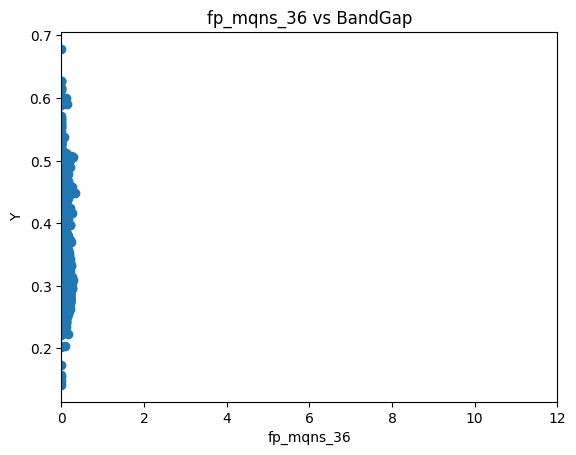

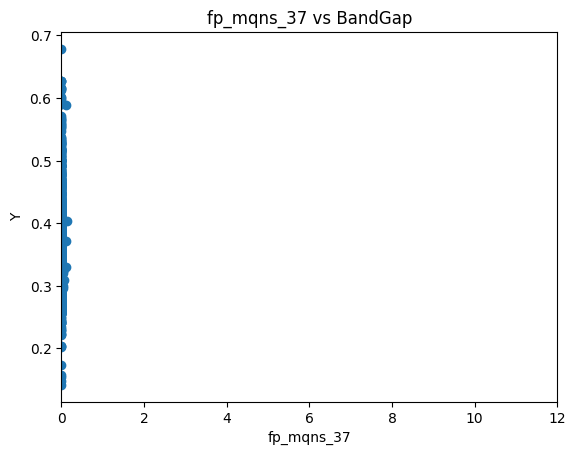

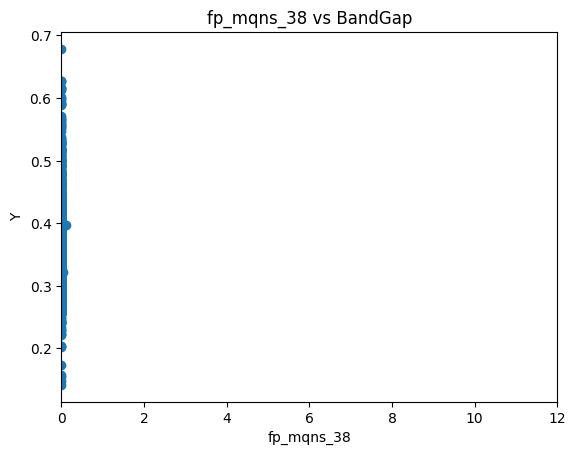

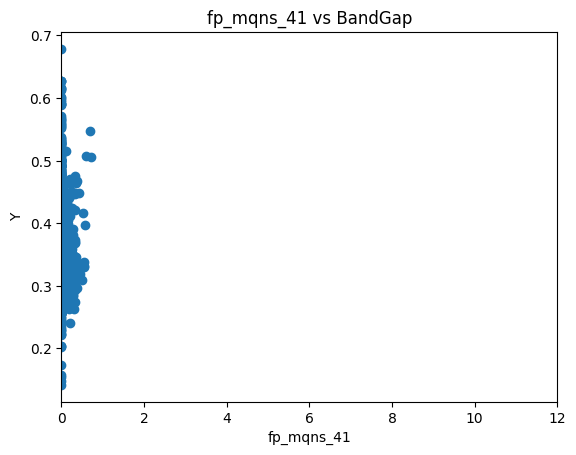

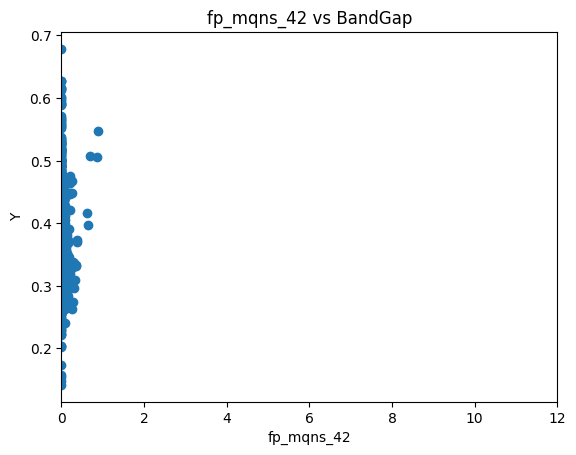

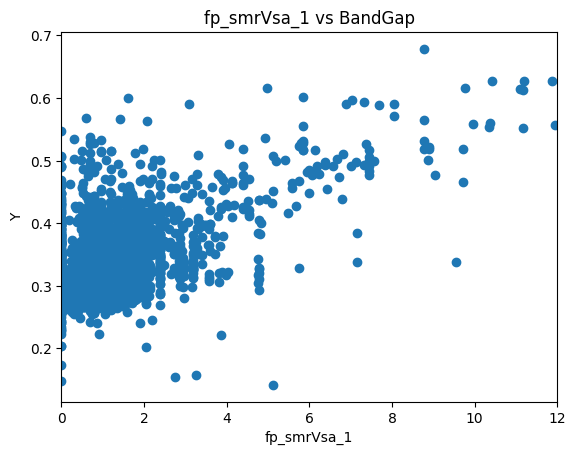

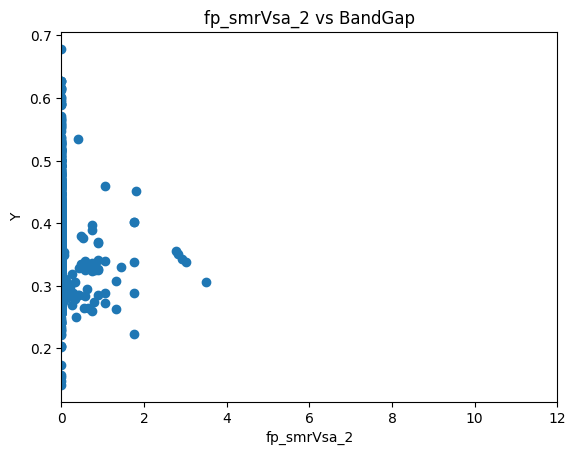

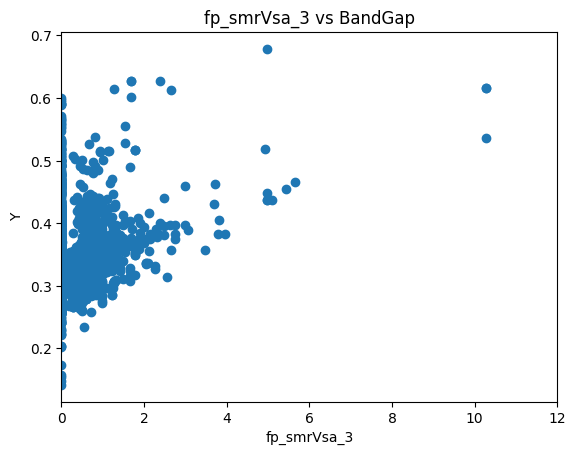

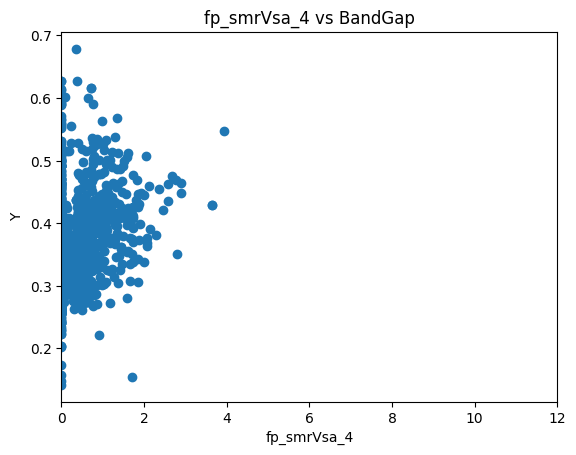

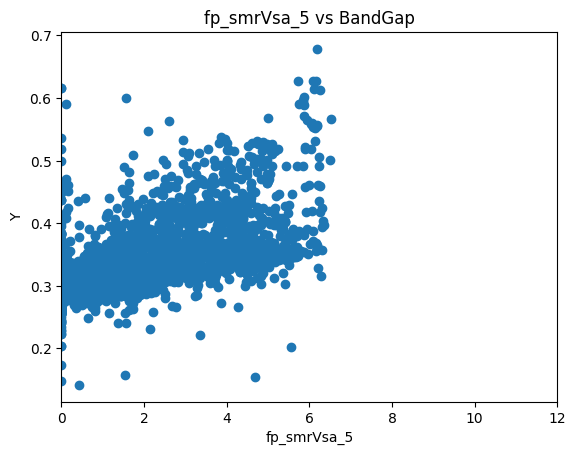

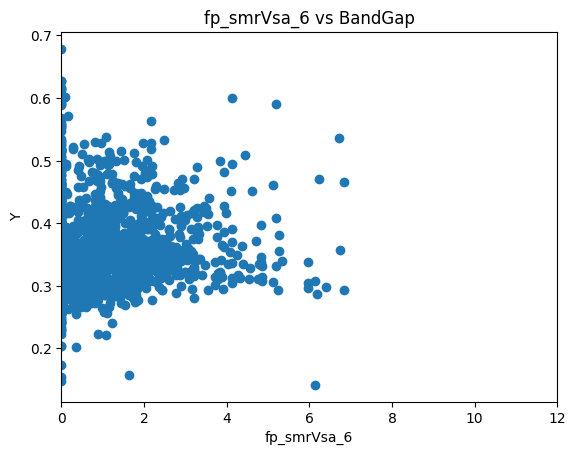

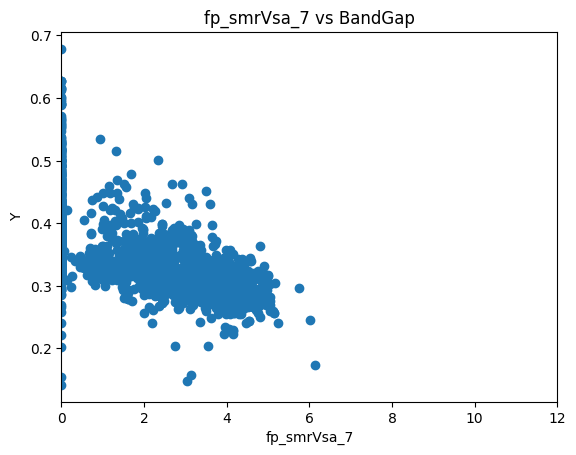

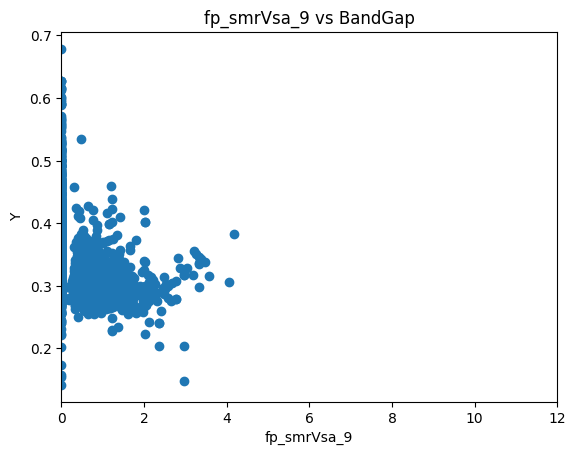

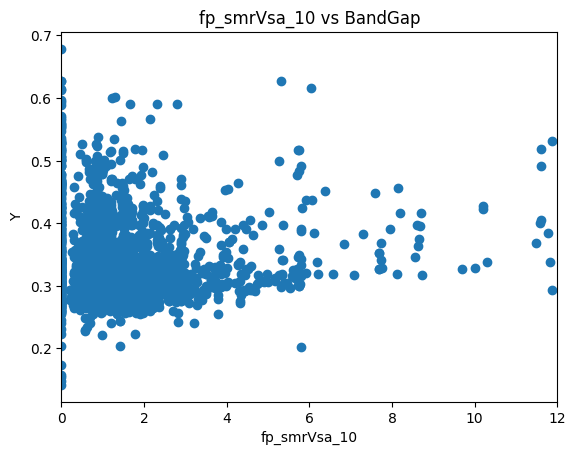

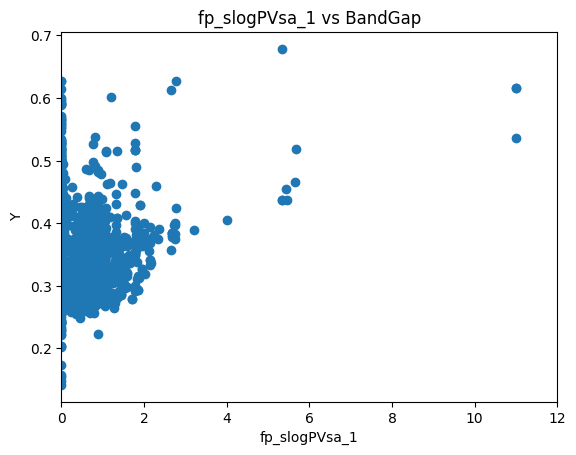

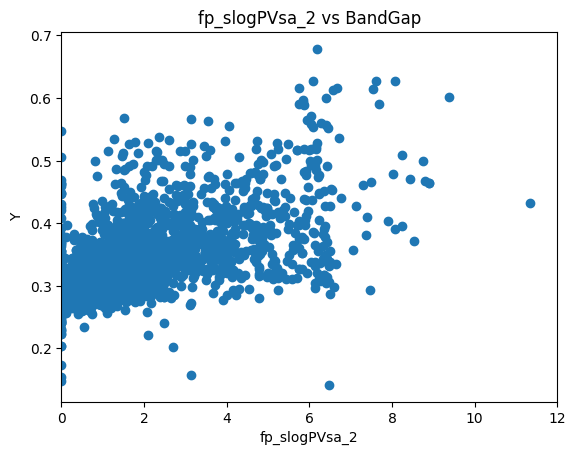

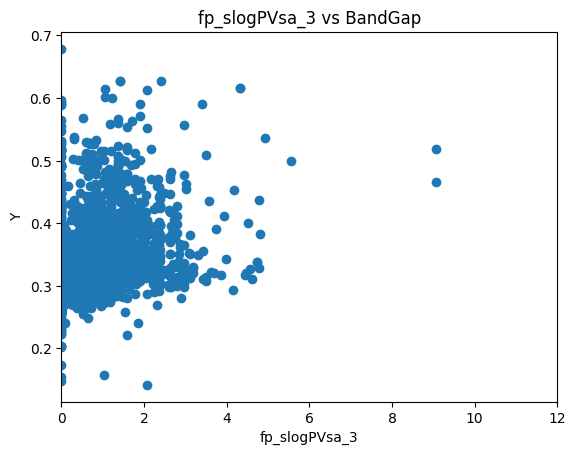

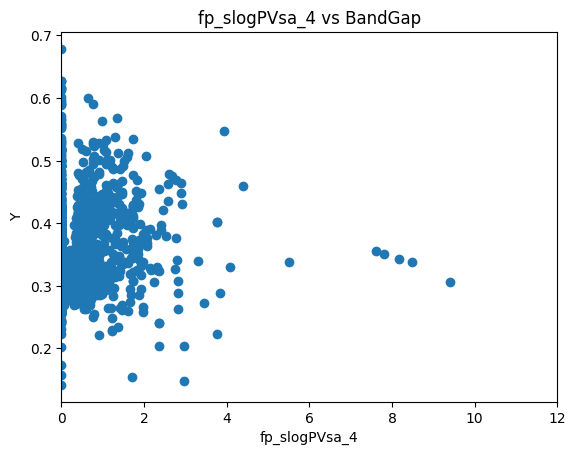

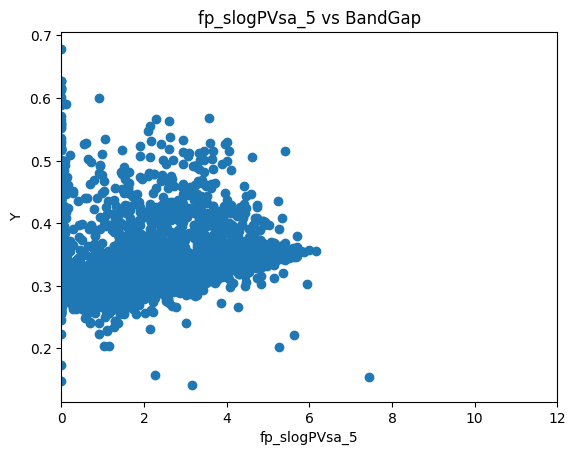

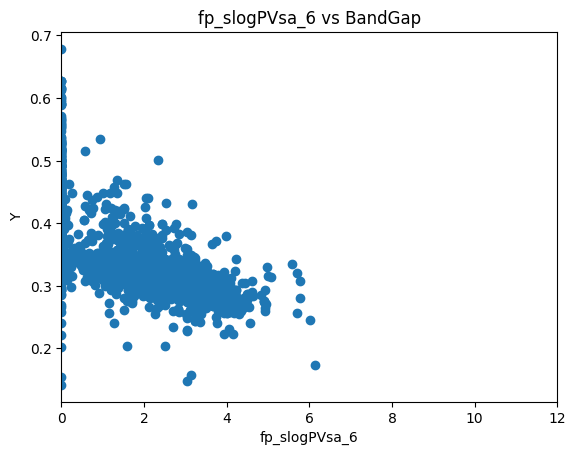

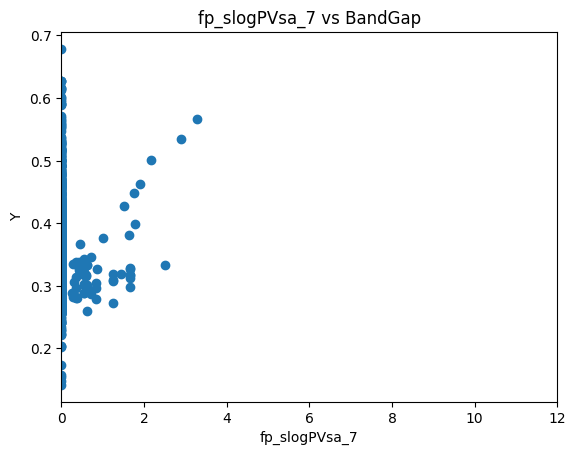

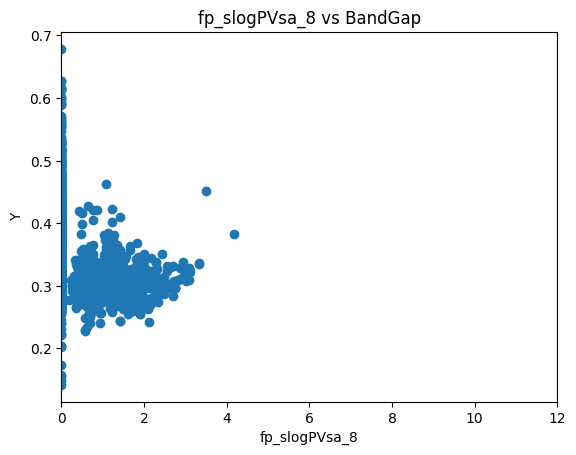

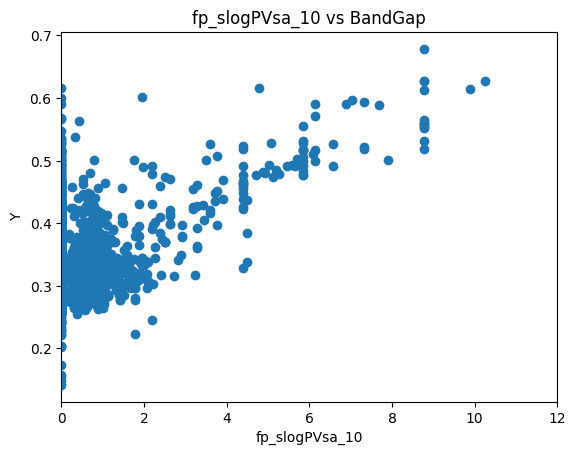

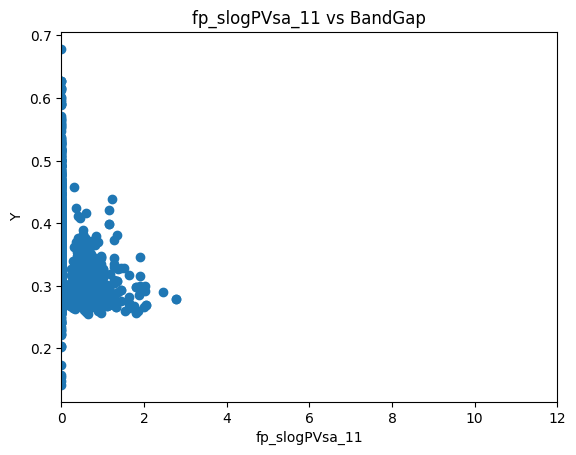

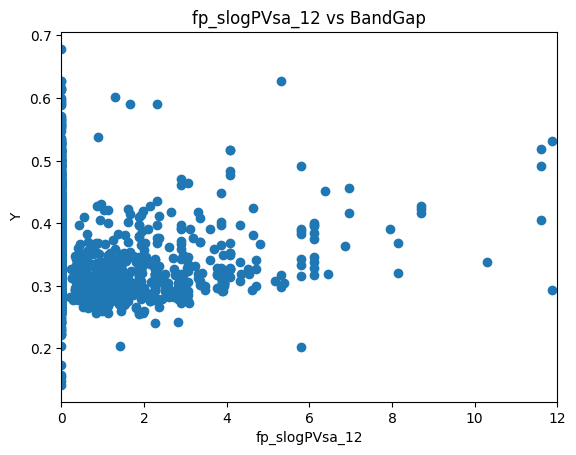

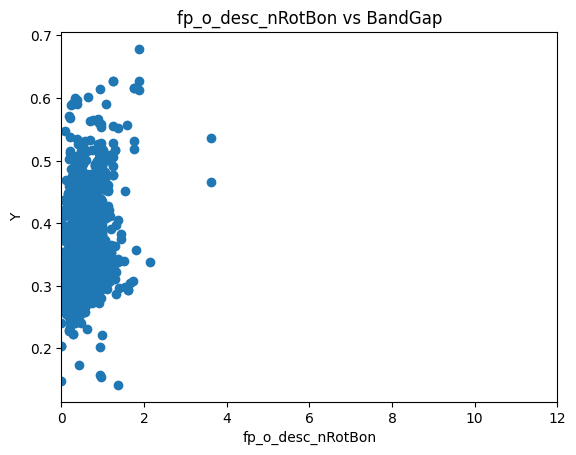

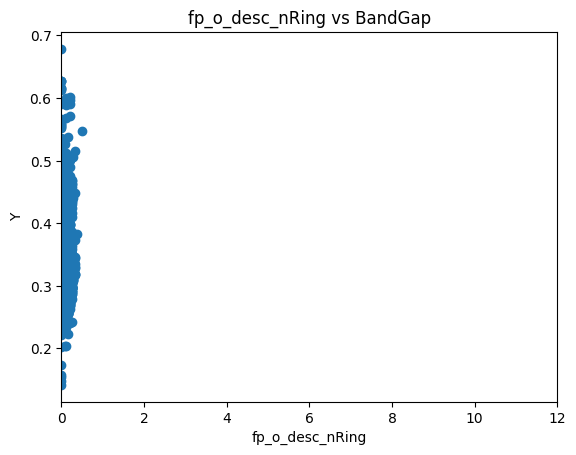

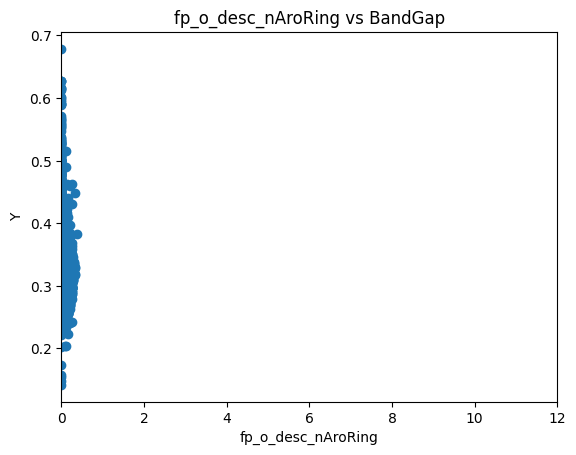

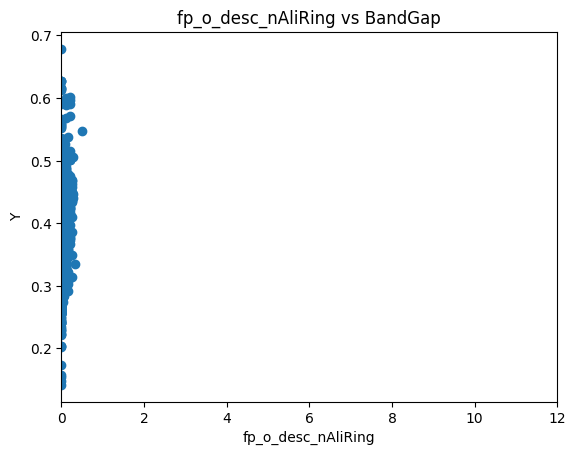

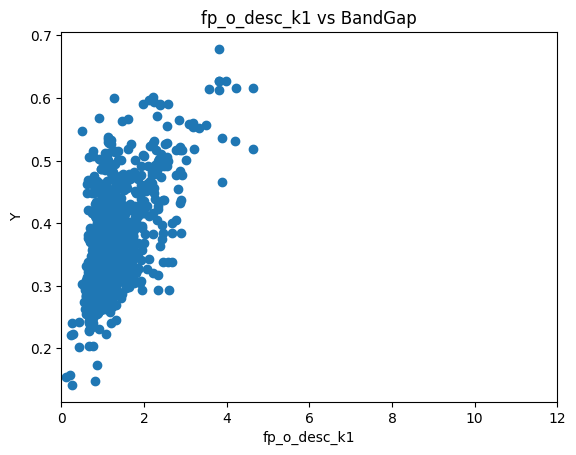

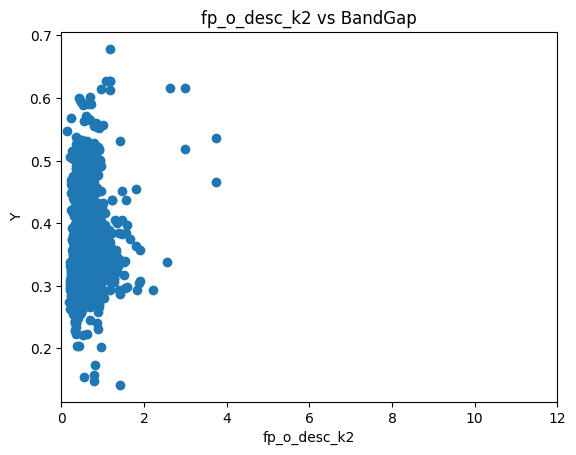

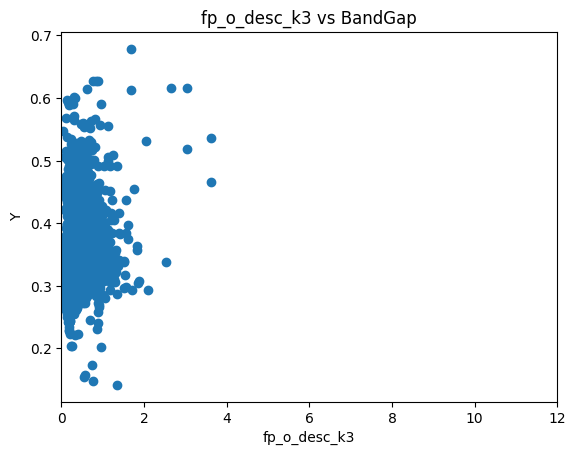

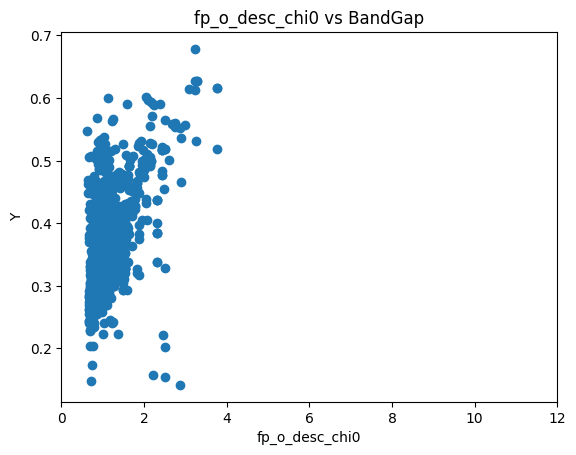

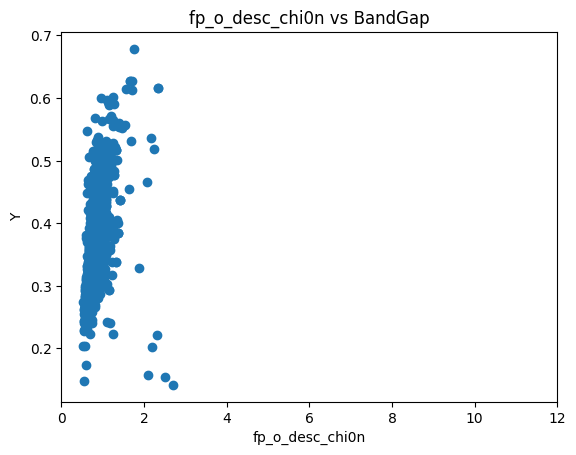

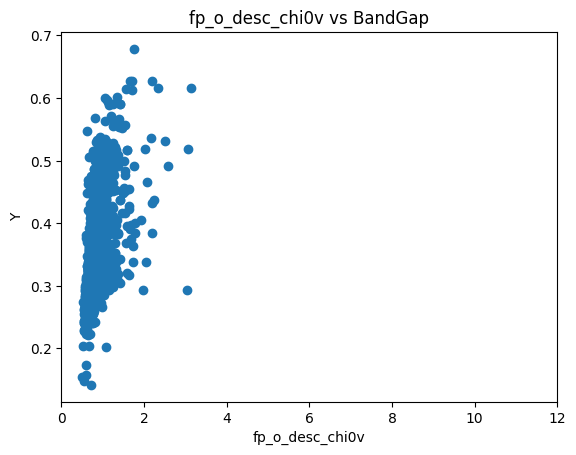

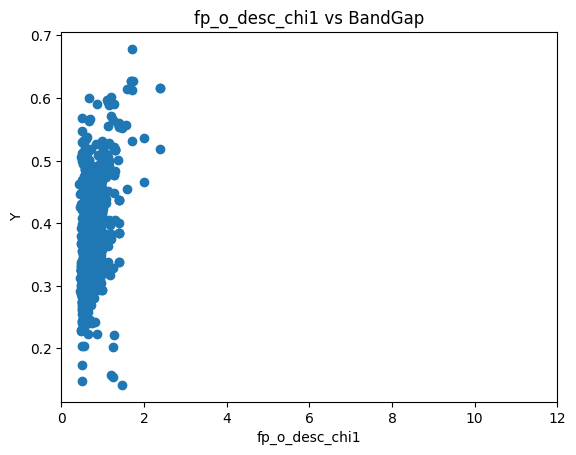

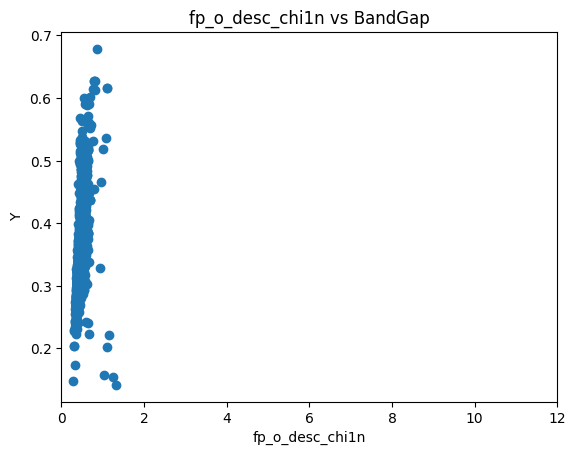

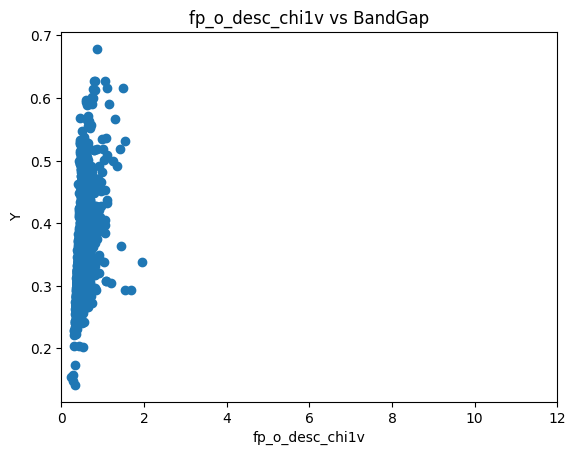

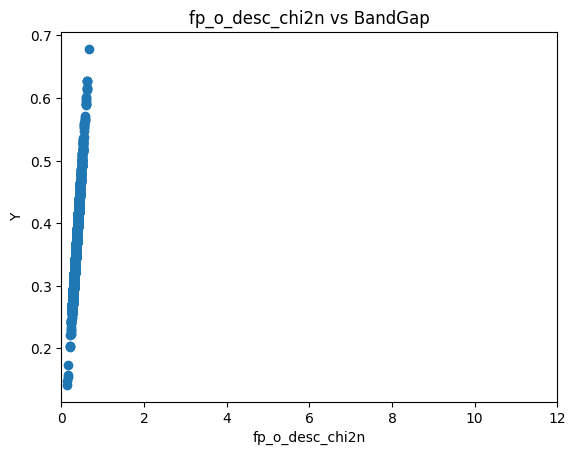

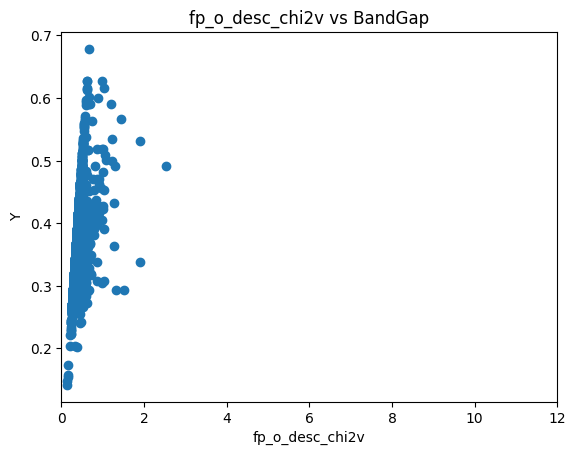

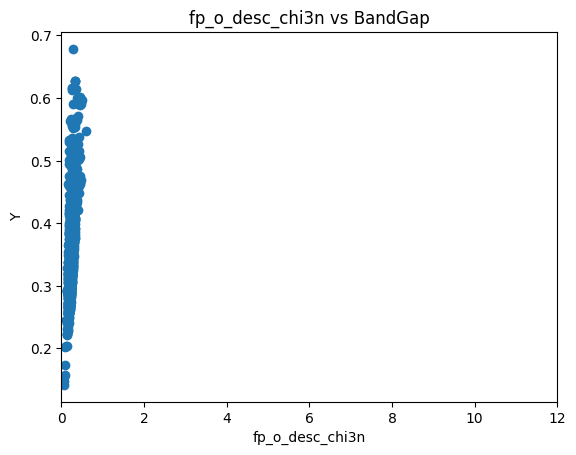

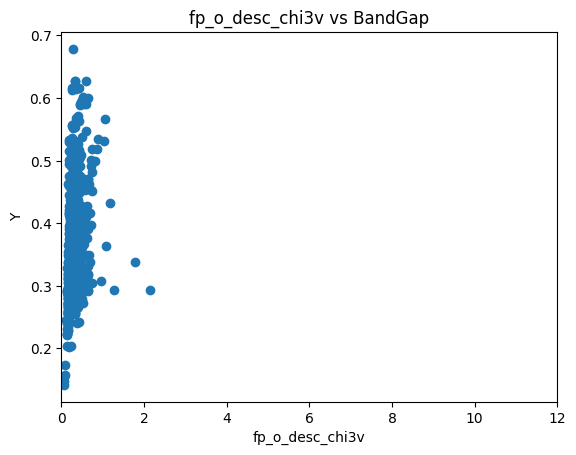

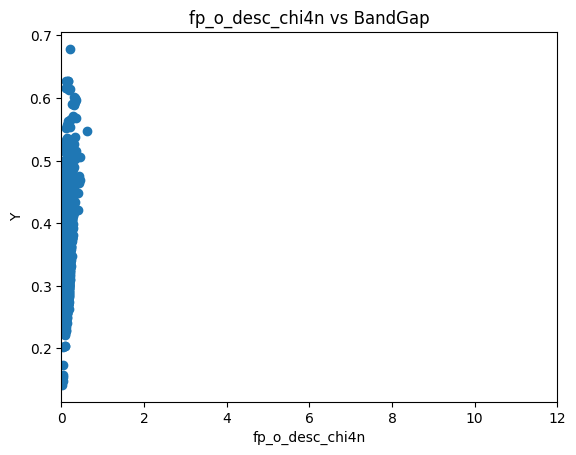

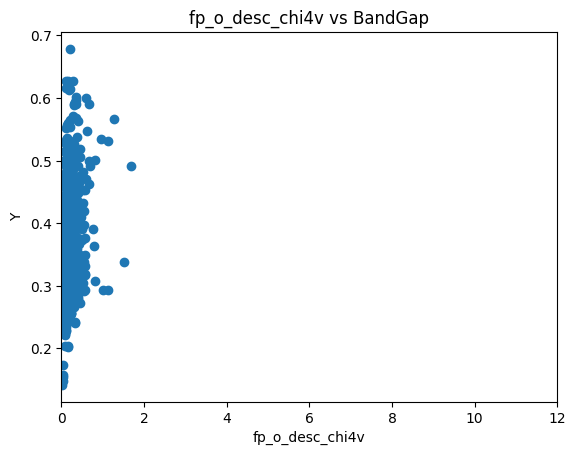

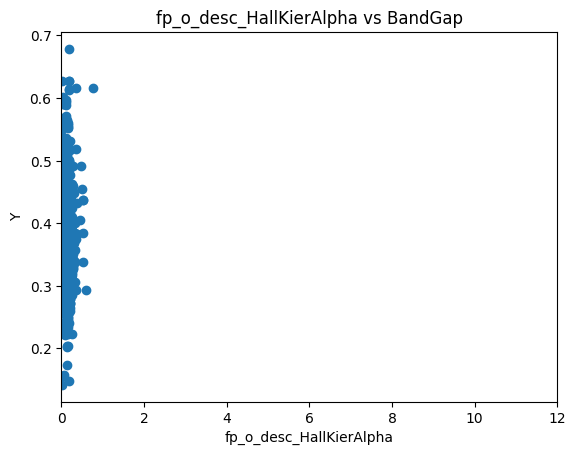

In [15]:
plt.figure(figsize=(30,30))
for i in range(2,train_data.shape[1]-1):
    plt.scatter(train_data.iloc[:,i],train_data.iloc[:,73])
    plt.xlim(0, 12)
    xlabel = train_data.iloc[:,i].name
    plt.xlabel(xlabel)
    plt.ylabel('Y')
    plt.title('{} vs BandGap'.format(train_data.iloc[:,i].name))
    plt.show()

Band Gap has no correlation to - 
fq_mqns_5
fq_mqns_24
fq_mqns_25
fq_mqns_33
fq_mqns_34
fq_mqns_37
fq_mqns_38


In [16]:
train_data = train_data.drop(['fp_mqns_5','fp_mqns_24','fp_mqns_25','fp_mqns_33','fp_mqns_34','fp_mqns_37','fp_mqns_38'], axis=1)

In [17]:
train_data.columns

Index(['id', 'polymer', 'fp_mqns_2', 'fp_mqns_3', 'fp_mqns_4', 'fp_mqns_6',
       'fp_mqns_7', 'fp_mqns_8', 'fp_mqns_9', 'fp_mqns_10', 'fp_mqns_11',
       'fp_mqns_12', 'fp_mqns_13', 'fp_mqns_14', 'fp_mqns_15', 'fp_mqns_16',
       'fp_mqns_17', 'fp_mqns_19', 'fp_mqns_20', 'fp_mqns_21', 'fp_mqns_22',
       'fp_mqns_23', 'fp_mqns_26', 'fp_mqns_27', 'fp_mqns_28', 'fp_mqns_29',
       'fp_mqns_30', 'fp_mqns_31', 'fp_mqns_32', 'fp_mqns_35', 'fp_mqns_36',
       'fp_mqns_41', 'fp_mqns_42', 'fp_smrVsa_1', 'fp_smrVsa_2', 'fp_smrVsa_3',
       'fp_smrVsa_4', 'fp_smrVsa_5', 'fp_smrVsa_6', 'fp_smrVsa_7',
       'fp_smrVsa_9', 'fp_smrVsa_10', 'fp_slogPVsa_1', 'fp_slogPVsa_2',
       'fp_slogPVsa_3', 'fp_slogPVsa_4', 'fp_slogPVsa_5', 'fp_slogPVsa_6',
       'fp_slogPVsa_7', 'fp_slogPVsa_8', 'fp_slogPVsa_10', 'fp_slogPVsa_11',
       'fp_slogPVsa_12', 'fp_o_desc_nRotBon', 'fp_o_desc_nRing',
       'fp_o_desc_nAroRing', 'fp_o_desc_nAliRing', 'fp_o_desc_k1',
       'fp_o_desc_k2', 'fp_o_desc_k3', 

All the waste columns were dropped.

In [18]:
test_data = test_data.drop(['fp_mqns_1','fp_mqns_18','fp_mqns_39','fp_mqns_40','fp_smrVsa_8','fp_slogPVsa_9','fp_mqns_5','fp_mqns_24','fp_mqns_25','fp_mqns_33','fp_mqns_34','fp_mqns_37','fp_mqns_38'], axis=1)

In [19]:
print(train_data.shape)
print(test_data.shape)

(2534, 74)
(845, 73)


In [47]:
import seaborn as sns

<Axes: >

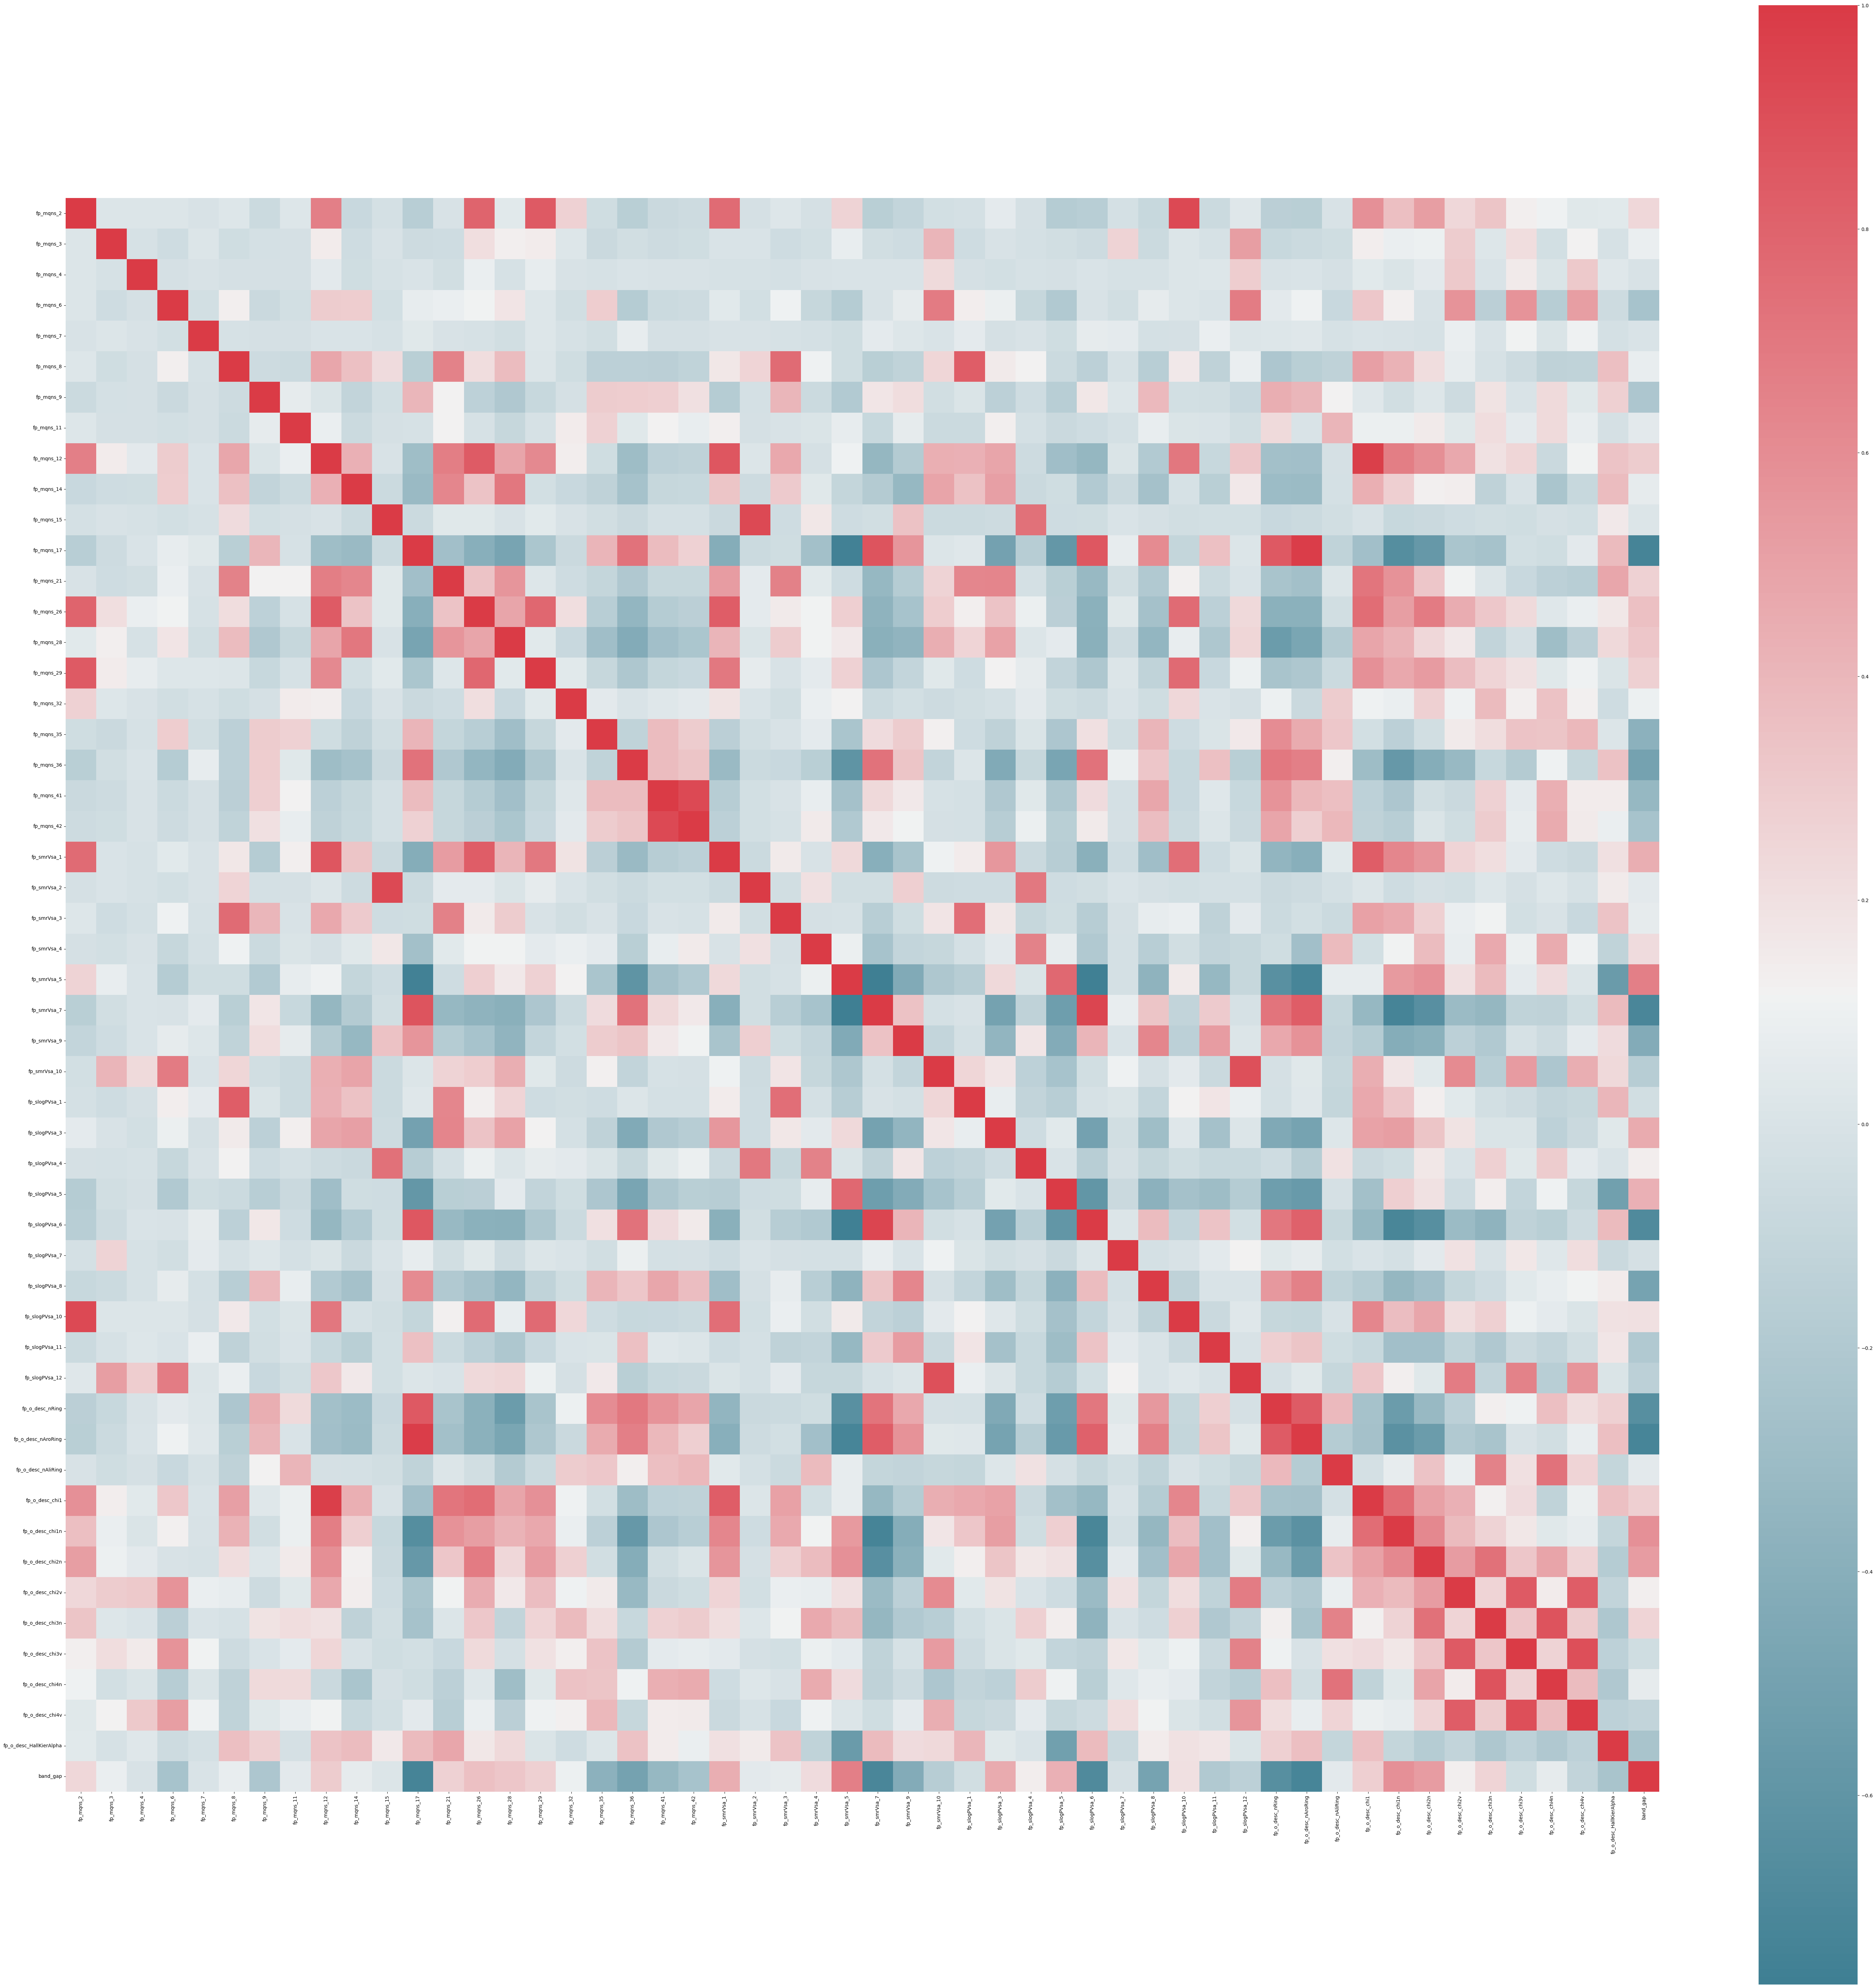

In [48]:
f, ax = plt.subplots(figsize=(74, 74))
corr = train_data.loc[:,~train_data.columns.isin(['id','polymer'])].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [21]:
train_stats = train_data.describe()
test_stats = test_data.describe()

In [23]:
print(train_stats)
print(test_stats)

                id    fp_mqns_2   fp_mqns_3    fp_mqns_4    fp_mqns_6  \
count  2534.000000  2534.000000  2534.00000  2534.000000  2534.000000   
mean   1710.470797     0.055032     0.01115     0.002470     0.033564   
std     968.637489     0.252474     0.07151     0.029294     0.094183   
min       1.000000     0.000000     0.00000     0.000000     0.000000   
25%     884.250000     0.000000     0.00000     0.000000     0.000000   
50%    1723.500000     0.000000     0.00000     0.000000     0.000000   
75%    2548.750000     0.000000     0.00000     0.000000     0.000000   
max    3377.000000     2.333333     1.50000     1.000000     1.000000   

         fp_mqns_7    fp_mqns_8    fp_mqns_9   fp_mqns_10   fp_mqns_11  ...  \
count  2534.000000  2534.000000  2534.000000  2534.000000  2534.000000  ...   
mean      0.000693     0.061983     0.027791     0.200027     0.008053  ...   
std       0.006922     0.128136     0.071108     0.194629     0.038630  ...   
min       0.000000     0.0

Komolgorov Smironov test - 
This test is particularly valuable in various fields, including statistics, data analysis, and quality control, where the uniformity of random numbers or the distributional differences between datasets need to be rigorously examined.

**It is used when two different columns are given(usually of random numbers) come from the same distribution or not.**

**Two-Sample Kolmogorov–Smirnov Test**
The two-sample Kolmogorov-Smirnov (KS) test is used to compare two independent samples to assess whether they come from the same distribution. It’s a distribution-free test that evaluates the maximum vertical difference between the empirical distribution functions (EDFs) of the two samples.


Statistic indicates a large discrepancy between the two distributions.
A small P value shows that the two samples do not come from the same distribution

In [50]:
import numpy as np
from scipy.stats import ks_2samp
for i in range(3, 74):
    sample1 = train_data.iloc[:,i].to_numpy()
    sample2 = test_data.iloc[:,i].to_numpy()
    ks_statistic, p_value = ks_2samp(sample1, sample2)

#     print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
#     print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value < alpha:
        print(train_data.iloc[:,i].name)
        print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
        print(f"P-value: {p_value}")


fp_mqns_21
Kolmogorov–Smirnov Statistic: 0.06571643401222661
P-value: 0.00787873639144171


IndexError: single positional indexer is out-of-bounds

In [25]:
train_data.shape

(2534, 74)

In [26]:
train_data[['fp_mqns_10','fp_mqns_13','fp_mqns_16','fp_mqns_19','fp_mqns_20','fp_mqns_21','fp_mqns_22','fp_mqns_23','fp_mqns_27','fp_mqns_30','fp_mqns_31','fp_smrVsa_6','fp_slogPVsa_2','fp_o_desc_nRotBon','fp_o_desc_k1','fp_o_desc_k2','fp_o_desc_k3','fp_o_desc_chi0','fp_o_desc_chi0n','fp_o_desc_chi0v','fp_o_desc_chi1v']].describe()

,fp_mqns_10,fp_mqns_13,fp_mqns_16,fp_mqns_19,fp_mqns_20,fp_mqns_21,fp_mqns_22,fp_mqns_23,fp_mqns_27,fp_mqns_30,...,fp_smrVsa_6,fp_slogPVsa_2,fp_o_desc_nRotBon,fp_o_desc_k1,fp_o_desc_k2,fp_o_desc_k3,fp_o_desc_chi0,fp_o_desc_chi0n,fp_o_desc_chi0v,fp_o_desc_chi1v
count,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,0.200027,0.811019,0.317537,0.555751,0.505948,0.297661,0.069705,0.065635,0.445289,0.302175,...,0.778999,1.855515,0.555751,1.117934,0.603220,0.457323,1.017419,0.787612,0.824940,0.499494
std,0.194629,0.552556,0.277852,0.338504,0.436475,0.257430,0.141490,0.131319,0.391952,0.260624,...,1.041470,1.706210,0.338504,0.439506,0.306367,0.363322,0.333010,0.177366,0.216067,0.126236
min,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.104939,0.133676,0.039615,0.611786,0.532874,0.506446,0.244418
25%,0.067857,0.391667,0.000000,0.267857,0.250000,0.157895,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.645056,0.267857,0.839864,0.371750,0.192605,0.841124,0.678326,0.697086,0.418513
50%,0.166667,0.703125,0.333333,0.479167,0.444444,0.261905,0.010417,0.010417,0.344289,0.321429,...,0.455000,1.348460,0.479167,1.024561,0.513270,0.311494,0.927717,0.752283,0.780257,0.484089
75%,0.285714,1.133929,0.514093,0.839286,0.666667,0.375000,0.102002,0.100000,0.714286,0.515625,...,1.115583,2.496483,0.839286,1.246667,0.800313,0.656418,1.072062,0.848756,0.880928,0.531963
max,2.000000,3.958333,1.500000,3.625000,6.000000,4.000000,2.250000,2.125000,3.750000,1.281250,...,6.832549,11.336223,3.625000,4.650000,3.755000,3.630000,3.771894,2.711394,3.147533,1.950662


fp_mqns_13, 

In [27]:
# test_data[['fp_mqns_10','fp_mqns_13','fp_mqns_16','fp_mqns_19','fp_mqns_20','fp_mqns_21','fp_mqns_22','fp_mqns_23','fp_mqns_27','fp_mqns_30','fp_mqns_31','fp_smrVsa_6','fp_slogPVsa_2','fp_o_desc_nRotBon','fp_o_desc_k1','fp_o_desc_k2','fp_o_desc_k3','fp_o_desc_chi0','fp_o_desc_chi0n','fp_o_desc_chi0v','fp_o_desc_chi1v']].describe()

In [28]:
train_data = train_data.drop(['fp_mqns_10','fp_mqns_13','fp_mqns_16','fp_mqns_19','fp_mqns_20','fp_mqns_22','fp_mqns_23','fp_mqns_27','fp_mqns_30','fp_mqns_31','fp_smrVsa_6','fp_slogPVsa_2','fp_o_desc_nRotBon','fp_o_desc_k1','fp_o_desc_k2','fp_o_desc_k3','fp_o_desc_chi0','fp_o_desc_chi0n','fp_o_desc_chi0v','fp_o_desc_chi1v'],axis=1)
test_data = test_data.drop(['fp_mqns_10','fp_mqns_13','fp_mqns_16','fp_mqns_19','fp_mqns_20','fp_mqns_22','fp_mqns_23','fp_mqns_27','fp_mqns_30','fp_mqns_31','fp_smrVsa_6','fp_slogPVsa_2','fp_o_desc_nRotBon','fp_o_desc_k1','fp_o_desc_k2','fp_o_desc_k3','fp_o_desc_chi0','fp_o_desc_chi0n','fp_o_desc_chi0v','fp_o_desc_chi1v'],axis=1)

In [29]:
# train_data = train_data.drop(['fp_slogPVsa_1', 'fp_smrVsa_2', 'fp_o_desc_chi2v', 'fp_slogPVsa_10', 'fp_o_desc_chi3v', 'fp_slogPVsa_6', 'fp_smrVsa_1', 'fp_o_desc_nRing', 'fp_mqns_26', 'fp_o_desc_chi4v', 'fp_mqns_21', 'fp_mqns_29' , 'fp_o_desc_chi4n', 'fp_o_desc_nAroRing',  'fp_slogPVsa_12', 'fp_o_desc_chi1n', 'fp_mqns_42', 'fp_smrVsa_7', 'fp_o_desc_chi1'],axis=1)
# test_data = test_data.drop(['fp_slogPVsa_1', 'fp_smrVsa_2', 'fp_o_desc_chi2v', 'fp_slogPVsa_10', 'fp_o_desc_chi3v', 'fp_slogPVsa_6', 'fp_smrVsa_1', 'fp_o_desc_nRing', 'fp_mqns_26', 'fp_o_desc_chi4v', 'fp_mqns_21', 'fp_mqns_29', 'fp_o_desc_chi4n', 'fp_o_desc_nAroRing', 'fp_slogPVsa_12', 'fp_o_desc_chi1n', 'fp_mqns_42', 'fp_smrVsa_7', 'fp_o_desc_chi1'],axis=1)

In [30]:
train_data.shape

(2534, 54)

In [31]:
train_data.columns

Index(['id', 'polymer', 'fp_mqns_2', 'fp_mqns_3', 'fp_mqns_4', 'fp_mqns_6',
       'fp_mqns_7', 'fp_mqns_8', 'fp_mqns_9', 'fp_mqns_11', 'fp_mqns_12',
       'fp_mqns_14', 'fp_mqns_15', 'fp_mqns_17', 'fp_mqns_21', 'fp_mqns_26',
       'fp_mqns_28', 'fp_mqns_29', 'fp_mqns_32', 'fp_mqns_35', 'fp_mqns_36',
       'fp_mqns_41', 'fp_mqns_42', 'fp_smrVsa_1', 'fp_smrVsa_2', 'fp_smrVsa_3',
       'fp_smrVsa_4', 'fp_smrVsa_5', 'fp_smrVsa_7', 'fp_smrVsa_9',
       'fp_smrVsa_10', 'fp_slogPVsa_1', 'fp_slogPVsa_3', 'fp_slogPVsa_4',
       'fp_slogPVsa_5', 'fp_slogPVsa_6', 'fp_slogPVsa_7', 'fp_slogPVsa_8',
       'fp_slogPVsa_10', 'fp_slogPVsa_11', 'fp_slogPVsa_12', 'fp_o_desc_nRing',
       'fp_o_desc_nAroRing', 'fp_o_desc_nAliRing', 'fp_o_desc_chi1',
       'fp_o_desc_chi1n', 'fp_o_desc_chi2n', 'fp_o_desc_chi2v',
       'fp_o_desc_chi3n', 'fp_o_desc_chi3v', 'fp_o_desc_chi4n',
       'fp_o_desc_chi4v', 'fp_o_desc_HallKierAlpha', 'band_gap'],
      dtype='object')

In [32]:
train_data = train_data.drop(["polymer"],axis=1)
test_data = test_data.drop(["polymer"],axis=1)

In [33]:
test_data.id

0       402
1       321
2       457
3       879
4      1536
       ... 
840    1999
841     859
842    2093
843    2578
844    3093
Name: id, Length: 845, dtype: int64

In [34]:
X = train_data.drop('band_gap', axis = 1)
y = train_data['band_gap']

In [35]:
# #normalize
# from sklearn.preprocessing import MinMaxScaler
# # Min-Max scaling (normalize features to range [0, 1])
# scaler = MinMaxScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# test_data.iloc[:,1:] = pd.DataFrame(scaler.fit_transform(test_data.iloc[:,1:]), columns=test_data.columns[1:])

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True)

In [37]:
X_train.shape

(1900, 52)

In [38]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
y_trainpred = model_lr.predict(X_val)
y_pred = model_lr.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)

0.6420416376499045


In [39]:
#trying out a simple rf model
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_rf.fit(X_train,y_train)
y_tpred = model_rf.predict(X_train)
mset = mean_squared_error(y_train, y_tpred)
print(mset)
y_pred = model_rf.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)

0.05076865490068314
0.39795255385128836


In [40]:
feature_importance = model_rf.feature_importances_
feature_names = test_data.columns
feature_importance_df = pd.DataFrame({'feature':feature_names, 'imp': feature_importance} )
feature_importance_df = feature_importance_df.sort_values(by='imp', ascending = False)
print(feature_importance_df)

                    feature       imp
12               fp_mqns_17  0.364659
34            fp_slogPVsa_6  0.138916
36            fp_slogPVsa_8  0.085299
4                 fp_mqns_6  0.046890
41       fp_o_desc_nAroRing  0.038791
26              fp_smrVsa_5  0.030551
27              fp_smrVsa_7  0.026483
18               fp_mqns_35  0.017350
29             fp_smrVsa_10  0.016228
51  fp_o_desc_HallKierAlpha  0.015530
44          fp_o_desc_chi1n  0.014824
31            fp_slogPVsa_3  0.013823
30            fp_slogPVsa_1  0.012615
15               fp_mqns_28  0.010327
37           fp_slogPVsa_10  0.010035
45          fp_o_desc_chi2n  0.009640
13               fp_mqns_21  0.009284
47          fp_o_desc_chi3n  0.008483
22              fp_smrVsa_1  0.008405
48          fp_o_desc_chi3v  0.008294
43           fp_o_desc_chi1  0.008127
14               fp_mqns_26  0.007978
24              fp_smrVsa_3  0.007868
10               fp_mqns_14  0.007854
46          fp_o_desc_chi2v  0.007659
33          

In [41]:
train_data = train_data.drop(feature_importance_df.iloc[:,21:].columns,axis=1)
test_data = test_data.drop(feature_importance_df.iloc[:,21:].columns,axis=1)

In [42]:
import xgboost as xgb
model3 = xgb.XGBRegressor(
    max_depth = 7,
    learning_rate = 0.1,
    n_estimators = 100,
    verbosity = 1
)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(mse)

0.3736108835747916


In [43]:
test_data.id

0       402
1       321
2       457
3       879
4      1536
       ... 
840    1999
841     859
842    2093
843    2578
844    3093
Name: id, Length: 845, dtype: int64

In [44]:
test_data.columns

Index(['id', 'fp_mqns_2', 'fp_mqns_3', 'fp_mqns_4', 'fp_mqns_6', 'fp_mqns_7',
       'fp_mqns_8', 'fp_mqns_9', 'fp_mqns_11', 'fp_mqns_12', 'fp_mqns_14',
       'fp_mqns_15', 'fp_mqns_17', 'fp_mqns_21', 'fp_mqns_26', 'fp_mqns_28',
       'fp_mqns_29', 'fp_mqns_32', 'fp_mqns_35', 'fp_mqns_36', 'fp_mqns_41',
       'fp_mqns_42', 'fp_smrVsa_1', 'fp_smrVsa_2', 'fp_smrVsa_3',
       'fp_smrVsa_4', 'fp_smrVsa_5', 'fp_smrVsa_7', 'fp_smrVsa_9',
       'fp_smrVsa_10', 'fp_slogPVsa_1', 'fp_slogPVsa_3', 'fp_slogPVsa_4',
       'fp_slogPVsa_5', 'fp_slogPVsa_6', 'fp_slogPVsa_7', 'fp_slogPVsa_8',
       'fp_slogPVsa_10', 'fp_slogPVsa_11', 'fp_slogPVsa_12', 'fp_o_desc_nRing',
       'fp_o_desc_nAroRing', 'fp_o_desc_nAliRing', 'fp_o_desc_chi1',
       'fp_o_desc_chi1n', 'fp_o_desc_chi2n', 'fp_o_desc_chi2v',
       'fp_o_desc_chi3n', 'fp_o_desc_chi3v', 'fp_o_desc_chi4n',
       'fp_o_desc_chi4v', 'fp_o_desc_HallKierAlpha'],
      dtype='object')

In [45]:
y_test = model3.predict(test_data)
sub = pd.DataFrame({'id': test_data.id, 'band_gap': y_test})
print(sub)

       id  band_gap
0     402  5.265498
1     321  2.809279
2     457  3.692598
3     879  3.069624
4    1536  2.628418
..    ...       ...
840  1999  5.910882
841   859  4.726249
842  2093  5.737685
843  2578  3.761882
844  3093  6.396754

[845 rows x 2 columns]


In [46]:
sub.to_csv('sub13.csv', index = False)